# Telecom Churn Case Study
1. Eshan Tiwari
2. Manish Verma
3. Mehak Kalra

## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

So we need to analyse customer-level data of a leading telecom firm to build predictive models for identifying customers at high risk of churn and the main indicators of churn.

## Assumptions and Contraints

- The churn is defined as Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
- The churn prediction will be only done for high value customers. The 'High-value Customers' are defined as the custmer with recharge value of more or equal to 70th percentile for the average recharge done in the first two months

## The analysis Structure is as follows:
- Read and inspect the data
- Treat missing values 
- Filter out high-value customers
- Calculate Churn
- Prepare the data for modelling
- Model development and model optimization
- Business Insights

## 1. Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import datetime

# data manipulation libraries
import pandas as pd
import numpy as np

# data vizualization libraries
import seaborn as sns
from matplotlib import pyplot as plt

# machine learning libraries
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Enabling display of all the rows
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 300)

## 2. Reading and Inspecting Data

In [2]:
# read data
churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn.shape

(99999, 226)

In [4]:
# Looking at the data
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
# Using as it was not showing summary without verbose options
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

### <font color = purple>Observations
<font color = purple>    
1. The dataset has 99999 rows and 226 columns
2. The dataset has many features and hence feature engineering is needed for better visualization and faster modelling
3. The mobile column will be unique and can be used as the index of the dataset
4. Columns with date_of_last_rech, date_of_last_rech_data should be in date format
5. Columns aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g should be renamed per followed _6, _7, _8, _9 convention
6. Based on description, columns such as loc_og_mou, std_og_mou, total_og_mou, loc_ic_mou, std_ic_mou, total_ic_mou are expected to be sums of existing columns. We need to check this
7. Though all columns are numeric and categorical type, but we need to inspect which are the categorical columns.

In [6]:
# look at data statistics
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## 3: Initial transformations
1. Converting date columns to datetime format
2. Renaming inconsistent columns
3. Checking summed columns
4. Finding list of categorical columns
5. Making mobile number the ID of the dataset

In [7]:
# creating a backup of original data file
churn_data = churn.copy()

### 3.1. Converting date columns to datetime format

In [8]:
date_cols = churn.columns[churn.columns.str.contains('date')]
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
for dat in date_cols:
    churn[dat] = pd.to_datetime(churn[dat], format='%m/%d/%Y')
churn.dtypes

mobile_number                        int64
circle_id                            int64
loc_og_t2o_mou                     float64
std_og_t2o_mou                     float64
loc_ic_t2o_mou                     float64
last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
last_date_of_month_9        datetime64[ns]
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou

### 3.2. Renaming inconsistent columns

In [10]:
churn.rename(columns={'jun_vbc_3g': 'vbc_3g_6',
                   'jul_vbc_3g': 'vbc_3g_7',
                   'aug_vbc_3g': 'vbc_3g_8',
                   'sep_vbc_3g': 'vbc_3g_9',
                  }, inplace=True)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,

### 3.3. Checking summed columns
loc_og_mou, std_og_mou, total_og_mou, loc_ic_mou, std_ic_mou, total_ic_mou

In [11]:
# Grouping local and std outgoing and incoming totals columns as tot_col
tot_col = []
tot_st = ['loc_og_mou', 'std_og_mou', 'loc_ic_mou', 'std_ic_mou']
for st in tot_st:
    for i in range (6, 10):
        tot_col.append(st + "_" + str(i))
print(tot_col)

['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9']


In [12]:
# Grouping columns that attribute to local and std outgoing and incoming totals
sep_col = []
list_st = [
           'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', #'loc_og_t2c_mou',
           'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', #'std_og_t2c_mou',
           'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
           'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', #'std_ic_t2o_mou'
        ]
for st in list_st:
    for i in range (6, 10):
        sep_col.append(st + "_" + str(i))
print(sep_col)

['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9']


In [13]:
# Creating a copy of dataset to create checking columns that are unnecessary for later
teleco = churn.copy()

In [14]:
# Creating sum of totals for each group to compare against the already available columns in the dataset
for st in tot_col:
    s = 0
    cols = []
    for j in sep_col:
        if (st[:6] in j) and (st[-1] in j):
            cols.append(j)
    print(cols)
    new_col = st[:11] + st[-1] + '_tot'
    teleco[new_col] = 0
    for c in cols:
        teleco[new_col] += teleco[c]
teleco.head()        

['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6']
['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7']
['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8']
['loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9']
['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6']
['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7']
['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8']
['std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9']
['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6']
['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7']
['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8']
['loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9']
['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6']
['std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7']
['std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8']
['std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9']


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,loc_og_mou_6_tot,loc_og_mou_7_tot,loc_og_mou_8_tot,loc_og_mou_9_tot,std_og_mou_6_tot,std_og_mou_7_tot,std_og_mou_8_tot,std_og_mou_9_tot,loc_ic_mou_6_tot,loc_ic_mou_7_tot,loc_ic_mou_8_tot,loc_ic_mou_9_tot,std_ic_mou_6_tot,std_ic_mou_7_tot,std_ic_mou_8_tot,std_ic_mou_9_tot
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0

In [15]:
# Checking max diff between new totals created vs totals available in dataset
for col in tot_col:
    st_col = col + '_tot'
    print(round((teleco[col]-teleco[st_col]).max(), 2))

0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02


In [16]:
# Creating groups for total incoming and outgoing irrespective of local or std
for i in range(6, 10):
    og_cols = []
    for j in sep_col:
        if ('og' in j) and (j[-1] == str(i)):
            og_cols.append(j)
    print(og_cols)
    teleco["total_og"] = 0
    for c in og_cols:
        teleco["total_og"] += teleco[c]
    
    ic_cols = []
    for j in sep_col:
        if ('ic' in j) and (j[-1] == str(i)):
            ic_cols.append(j)
    print(ic_cols, "\n")
    teleco["total_ic"] = 0
    for c in ic_cols:
        teleco["total_ic"] += teleco[c]
teleco.head()        

['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6']
['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6'] 

['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7']
['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7'] 

['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8']
['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8'] 

['loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9']
['loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9'] 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,loc_og_mou_6_tot,loc_og_mou_7_tot,loc_og_mou_8_tot,loc_og_mou_9_tot,std_og_mou_6_tot,std_og_mou_7_tot,std_og_mou_8_tot,std_og_mou_9_tot,loc_ic_mou_6_tot,loc_ic_mou_7_tot,loc_ic_mou_8_tot,loc_ic_mou_9_tot,std_ic_mou_6_tot,std_ic_mou_7_tot,std_ic_mou_8_tot,std_ic_mou_9_tot,total_og,total_ic
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN

In [17]:
# Comparing these new totals against columns available in the dataset
for col in og_cols:
    print(round((teleco[col]-teleco['total_og']).max(), 2))
    
for col in ic_cols:
    print(round((teleco[col]-teleco['total_ic']).max(), 2))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### <font color = purple>Observations
<font color = purple>The totals are matching approximately at every row level. These columns will need to be dropped later to avoid multicollinearity. We will keep them for now for ease of EDA

### 3.4 Finding list of categorical columns

In [18]:
# Finding categorical columns: assuming columns with unique categories < 20 could be categorical
cat_cols = pd.DataFrame(columns=["No. of Unique Values", "Unique Values"])
for col in churn.columns:
    if len(churn[col].unique()) < 20:
        cat_cols.loc[col] = [len(churn[col].unique()), churn[col].unique()]
cat_cols 

,No. of Unique Values,Unique Values
circle_id,1,[109]
loc_og_t2o_mou,2,"[0.0, nan]"
std_og_t2o_mou,2,"[0.0, nan]"
loc_ic_t2o_mou,2,"[0.0, nan]"
last_date_of_month_6,1,[2014-06-30T00:00:00.000000000]
last_date_of_month_7,2,"[2014-07-31T00:00:00.000000000, NaT]"
last_date_of_month_8,2,"[2014-08-31T00:00:00.000000000, NaT]"
last_date_of_month_9,2,"[2014-09-30T00:00:00.000000000, NaT]"
std_og_t2c_mou_6,2,"[nan, 0.0]"
std_og_t2c_mou_7,2,"[nan, 0.0]"


### <font color = purple>Observations
<font color = purple>    
1. circle_id has only 1 unique value and can be dropped
2. loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_x, std_og_t2c_mou_x, std_ic_t2o_mou_x have values 0 or NaN and can be dropped
3. monthly_2g_x, monthly_3g_x look like categorical or ordinal numerical variables. monthly_Xg_x seem like names of schemes that can be purchased. We can review how to handle these later in EDA.
4. If the monthly_2g_x and monthly_3g_x columns are categorical, it is possible the sachet ones are too based on the data dictionary. We can review how to handle these later in EDA.
3. night_pck_user_x, fb_user_x are binary variables

In [19]:
id_columns = ['mobile_number', 'circle_id']
date_columns = list(date_cols)
cat_columns = [column for column in cat_cols.index if column not in id_columns + date_columns]
cat_columns = cat_columns + ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', \
                                                             'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9']

num_columns = [column for column in churn.columns if column not in id_columns + date_columns + cat_columns]

print('The number of id columns is ' +str(len(id_columns)))
print('The number of date columns is ' +str(len(date_columns)))
print('The number of categorical columns is ' +str(len(cat_columns)))
print('The number of numerical columns is ' + str(len(num_columns)))

print(len(id_columns) + len(cat_columns) + len(date_columns)+len(num_columns))

The number of id columns is 2
The number of date columns is 12
The number of categorical columns is 35
The number of numerical columns is 177
226


### <font color = purple>Observations
<font color = purple>The total number of columns is same as the column number in the provided data

### 3.5. Making mobile number as index of the dataset

In [20]:
churn.set_index('mobile_number', inplace=True)
churn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,N

### 3.6. Dropping variables with low variance

In [21]:
# Dropping variables with low variance
cols = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', \
'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', \
'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', \
'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

churn.drop(cols, inplace=True, axis=1)
churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN

## 4. Treating Missing values
1. Finding % of missing in every column
2. Handling Columns with Large Missing Values
2. Handling Missing in Date columns
3. Handling Columns with Few Missing Values

### 4.1. Finding % of missing in every column

In [22]:
cols_missing = round(churn.isnull().sum()*100/len(churn), 2)
cols_missing.sort_values(ascending=False)

total_rech_data_6           74.85
count_rech_2g_6             74.85
arpu_2g_6                   74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
fb_user_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
fb_user_9                   74.08
arpu_2g_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user

### <font color = purple>Observations
<font color = purple>There is a definite pattern to the missing values in the above data. 
1. Attributes associated with data usage for a specific month demonstrate the same number of missing values. For eg., total_rech_data_6 and night_pck_user_6 have the same number of missing values. The dates of last data recharge also have similar missing values. These are likely to be customers who do not have data access and whose attributes should be replaced with 0s for both categorical and numerical variables because they do not have data. Just leave the date columns as-is
2. Attributes associated with calling mins for a specific month demonstrate the same number of missing values. For eg., loc_ic_t2m_mou_9 and onnet_mou_9 have the same number of missing values. However, the dates of last recharge have different missing values. Therefore, we will treat these as actual missing and use fancy impute in this case.

In [23]:
rech_data_date_cols = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', \
                       'date_of_last_rech_data_9']
cols = cols_missing[cols_missing>70].sort_values(ascending=False)
cols_to_drop = rech_data_date_cols 
cols.drop(cols_to_drop, inplace=True)
cols

total_rech_data_6     74.85
count_rech_2g_6       74.85
av_rech_amt_data_6    74.85
arpu_3g_6             74.85
max_rech_data_6       74.85
arpu_2g_6             74.85
count_rech_3g_6       74.85
night_pck_user_6      74.85
fb_user_6             74.85
total_rech_data_7     74.43
arpu_2g_7             74.43
night_pck_user_7      74.43
arpu_3g_7             74.43
max_rech_data_7       74.43
av_rech_amt_data_7    74.43
fb_user_7             74.43
count_rech_2g_7       74.43
count_rech_3g_7       74.43
count_rech_2g_9       74.08
max_rech_data_9       74.08
total_rech_data_9     74.08
fb_user_9             74.08
av_rech_amt_data_9    74.08
arpu_3g_9             74.08
arpu_2g_9             74.08
night_pck_user_9      74.08
count_rech_3g_9       74.08
count_rech_2g_8       73.66
count_rech_3g_8       73.66
fb_user_8             73.66
av_rech_amt_data_8    73.66
max_rech_data_8       73.66
arpu_3g_8             73.66
total_rech_data_8     73.66
arpu_2g_8             73.66
night_pck_user_8    

### 4.2. Handling columns with large number of missing values

In [24]:
for col in cols.index:
    churn[col].fillna(value=0, inplace=True)
    
cols_missing = round(churn.isnull().sum()*100/len(churn), 2)
cols_missing.sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
std_ic_mou_9                 7.75
std_og_t2t_mou_9             7.75
loc_og_t2t_mou_9             7.75
spl_og_mou_9                 7.75
loc_og_t2m_mou_9             7.75
isd_og_mou_9                 7.75
std_ic_t2m_mou_9             7.75
loc_og_t2f_mou_9             7.75
std_og_mou_9                 7.75
loc_og_t2c_mou_9             7.75
std_og_t2f_mou_9             7.75
std_og_t2m_mou_9             7.75
loc_og_mou_9                 7.75
roam_og_mou_9                7.75
isd_ic_mou_9                 7.75
std_ic_t2f_mou_9             7.75
roam_ic_mou_9                7.75
loc_ic_t2f_mou_9             7.75
std_ic_t2t_mou_9             7.75
offnet_mou_9                 7.75
loc_ic_mou_9                 7.75
spl_ic_mou_9                 7.75
onnet_mou_9                  7.75
og_others_9                  7.75
loc_ic_t2t_mou_9             7.75
ic_others_9   

### <font color = purple>Observations
<font color = purple>We have tackled the columns with high % of missing values except the rech_data date columns

### 4.3. Handling Missing in Date columns
1. Convert last recharge dates to days since recharge
2. Drop date columns retaining only days since recharge
3. Impute missing data in days since data recharge with high value because they indicate that these customers do not purchase data
4. Impute missing data in days since calling recharge with KNN imputer because missing values in these columns are different from other categories

In [25]:
max_date = pd.to_datetime('10/1/2014', format='%m/%d/%Y')
max_date

Timestamp('2014-10-01 00:00:00')

In [26]:
# Changing last recharge date columns for months 6, 7, 8 to days since recharge
churn['last_date_rech'] = churn['date_of_last_rech_8']
churn.loc[churn.last_date_rech.isnull(), 'last_date_rech'] = churn['date_of_last_rech_7']
churn.loc[churn.last_date_rech.isnull(), 'last_date_rech'] = churn['date_of_last_rech_6']
churn['days_since_rech'] = (max_date - churn['last_date_rech']).dt.days
# Leave missing values in days_since_rech as-is. Use KNN imputer here 

churn['last_date_rech_data'] = churn['date_of_last_rech_data_8']
churn.loc[churn.last_date_rech_data.isnull(), 'last_date_rech_data'] = churn['date_of_last_rech_data_7']
churn.loc[churn.last_date_rech_data.isnull(), 'last_date_rech_data'] = churn['date_of_last_rech_data_6']
churn['days_since_rech_data'] = (max_date - churn['last_date_rech_data']).dt.days
# Impute high value for days since rech data because it indicates that the customer doesnt use data
churn.loc[churn.days_since_rech_data.isnull(), 'days_since_rech_data'] = 99999

churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,last_date_rech,days_since_rech,last_date_rech_data,days_since_rech_data
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,

In [27]:
date_cols = churn.columns[churn.columns.str.contains('date')]
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'last_date_rech', 'last_date_rech_data'],
      dtype='object')

In [28]:
# Dropping date columns
churn.drop(date_cols, axis=1, inplace=True)
churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,days_since_rech,days_since_rech_data
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,10

### <font color = purple>Observations
<font color = purple>We have tackled the columns with high % of missing values and converted date columns to numerical variables

### 4.4. Handling Columns with Few Missing values

In [29]:
cols_missing = round(churn.isnull().sum()*100/len(churn), 2)
cols_missing

arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou_6        3.94
loc_og_t2c_mou_7        3.86
loc_og_t2c_mou

### <font color = purple>Observations
<font color = purple>We will impute the remaining columns after checking for high value customers to reduce time taken for KNN impute

## 5. Filtering the dataset for high value customers
1. Identifying high-value customers
2. Imputing Columns with few missing values

### 5.1. Identifying high-value customers
It would be a three step process:
- Calculating the amount spend on data recharge
- Calculating the amount of total recharge(data recharge + call recharge)
- Taking average value of the charge in the good phase (month 6 and month 7)
- Idenitfying customers having average recharge above or equal to 70 percentile

In [30]:
# calculating the total data recharge amount for June and July using number of recharges * average recharge amount
churn['total_data_rech_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_rech_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']

In [31]:
# calculate total recharge amount for June and July using call recharge amount + data recharge amount
churn['amt_data_6'] = churn['total_rech_amt_6'] + churn['total_data_rech_6']
churn['amt_data_7'] = churn['total_rech_amt_7'] + churn['total_data_rech_7']

In [32]:
# Averagere charge for good month
churn['av_amt_data_6_7'] = (churn['amt_data_6'] + churn['amt_data_7'])/2

In [33]:
# Calculating the 70th percentile
churn_threshold = churn['av_amt_data_6_7'].quantile(0.7)
churn_threshold

478.0

In [34]:
# Filtering the data for high value customers
churn_filtered = churn[churn['av_amt_data_6_7'] >= churn_threshold]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 208)

In [35]:
# Dropping the features which are used to calculate derived features for high value customer
churn_filtered = churn_filtered.drop(columns = ['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'])
churn_filtered.shape

(30001, 203)

### <font color = purple>Observations
<font color = purple>We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer. It is close the 29.9k value mentioned in the case study

### 5.2. Imputing Columns with few missing values

In [36]:
%%time
imputer = KNNImputer()
churn_imputed = imputer.fit_transform(churn_filtered)

Wall time: 3min 27s


In [37]:
len(churn_imputed)

30001

In [38]:
# convert imputed numpy array to pandas dataframe
churn_filtered = pd.DataFrame(churn_imputed, columns=churn_filtered.columns)
print(churn_filtered.isnull().sum()*100/len(churn_filtered.index))

arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2m_mou_9        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2f_mou_9        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_t2c_mou_9    

### <font color = purple>Observations
<font color = purple>There are no more missing values in the dataset

## 6. Create the target variable 'churn'
1. Setting churn based on calling and data usage in Month 9
2. Dropping Month 9 variables

### 6.1. Setting churn based on calling and data usage in Month 9

In [39]:
churn_filtered['churn'] = np.where((churn_filtered['total_og_mou_9']==0) & (churn_filtered['total_ic_mou_9']==0) & \
(churn_filtered['vol_2g_mb_9']==0) & (churn_filtered['vol_3g_mb_9']==0), 1, 0)
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,days_since_rech,days_since_rech_data,churn
0,197.385,214.816,213.803,21.100,1.764,8.50,0.00,4.074,23.72,45.802,0.00,23.864,17.852,11.322,0.00,7.054,15.176,8.928,0.00,17.948,1.658,1.958,0.00,2.702,8.652,19.696,0.00,2.824,0.00,3.688,0.00,0.016,0.0,0.0,0.00,0.00,10.314,25.344,0.00,5.544,0.00,3.092,0.00,0.000,0.00,11.558,0.00,4.446,0.00,5.376,0.00,0.00,0.00,20.026,0.00,4.446,0.0,0.00,0.00,0.000,0.0,0.0,0.00,0.348,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,37.096,18.02,0.16,17.592,30.026,31.714,4.13,38.594,1.446,1.904,1.15,0.94,68.572,51.644,5.44,57.13,3.238,3.198,0.00,0.624,20.142,12.242,0.00,6.710,0.00,0.00,0.00,0.066,23.382,15.442,0.00,7.402,0.00,0.00,5.44,0.00,0.04,0.0,0.0,0.048,1.856,2.06,0.00,0.000,0.00,0.03,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,968.0,30.40,0.00,1

In [40]:
# Checking the churn rate
print(churn_filtered.churn.value_counts()*100/len(churn_filtered.index))

0    91.863605
1     8.136395
Name: churn, dtype: float64


### <font color = purple>Observations
<font color = purple>There is a data imbalance and we need to take care of this during model creation

### 6.2 Dropping the derived features and original features belonging to Month 9 

In [41]:
month_9_features =  churn_filtered.filter(regex='9$', axis=1).columns
month_9_features

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'vbc_3g_9'],
      dtype='object')

In [42]:
# delete derived variables
churn_filtered = churn_filtered.drop(columns=month_9_features)

In [43]:
churn_filtered.shape

(30001, 154)

### <font color = purple>Observations
<font color = purple>We have added a churn column and dropped all columns for month_9

#### Updating the types of variables: numerical and categorical

In [44]:
churn_filtered.dtypes

arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_6        float64
loc_og_t2c_mou_7        float64
loc_og_t2c_mou_8        float64
loc_og_mou_6            float64
loc_og_mou_7            float64
loc_og_mou_8            float64
std_og_t2t_mou_6        float64
std_og_t

In [45]:
# update num_columns and cat_columns list
cat_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', \
              'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
              'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',\
              'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', \
               'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', \
              'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']

num_columns = [i for i in churn_filtered.columns if i not in cat_columns]

## 7: EDA
1. Univariate Analysis for Continuous variables
2. Dropping low-variance columns observed in Univariate Analysis for Continuous variables
3. Univariate Analysis for Categorical variables
4. Dropping low-variance columns observed in Univariate Analysis for Categorical variables
5. Grouping categories in variables with multiple categories
6. Bivariate Analysis: Analyzing variables that impact churn
7. Dropping aggregate columns
8. Checking Correlation Matrix
9. Dropping variables with high correlations

### 7.1. Univariate Analysis for Continuous variables

In [46]:
len(num_columns)

135

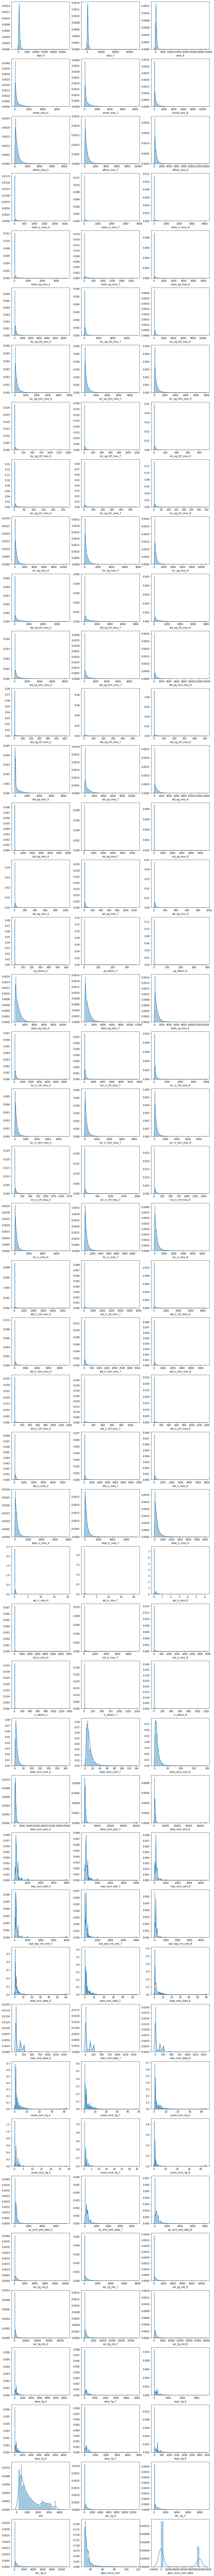

In [47]:
plt.figure(figsize=(15,200))
for col in enumerate(num_columns):
    plt.subplot(len(num_columns)//3, 3, col[0]+1)
    sns.distplot(churn_filtered[col[1]])
plt.show()

### <font color = purple>Observations
<font color = purple>1. Variables related with arpu, onnet, offnet, local/std outgoing and incoming, recharge-related,vbc-related and age on network are all heavily right skewed and need to fixed 
2. variables related with roaming, isd, others have very low variance. These are likely to have low impact so we will drop them

### 7.2 Dropping low-variance columns observed in Univariate Analysis for Continuous variables

In [48]:
roam_cols = churn_filtered.columns[churn_filtered.columns.str.contains('roam')]
roam_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8'],
      dtype='object')

In [49]:
isd_cols = churn_filtered.columns[churn_filtered.columns.str.contains('isd')]
isd_cols

Index(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8'],
      dtype='object')

In [50]:
others_cols = churn_filtered.columns[churn_filtered.columns.str.contains('other')]
others_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [51]:
cols_drop = list(roam_cols) + list(isd_cols) + list(others_cols)
cols_drop

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8']

In [52]:
# Checking value_counts in these columns
for col in cols_drop:
    print(col)
    print(churn_filtered[col].value_counts(normalize=True), '\n')

roam_ic_mou_6
0.00      0.778807
1.01      0.000467
0.86      0.000433
0.71      0.000433
1.26      0.000400
            ...   
344.89    0.000033
146.36    0.000033
22.66     0.000033
1.25      0.000033
354.68    0.000033
Name: roam_ic_mou_6, Length: 4267, dtype: float64 

roam_ic_mou_7
0.000      0.823373
8.356      0.000400
1.010      0.000400
0.510      0.000367
1.210      0.000333
             ...   
408.890    0.000033
22.660     0.000033
5.000      0.000033
3.500      0.000033
10.668     0.000033
Name: roam_ic_mou_7, Length: 3559, dtype: float64 

roam_ic_mou_8
0.000      0.800440
1.180      0.000467
2.438      0.000467
1.010      0.000433
0.980      0.000367
             ...   
210.910    0.000033
7.000      0.000033
11.250     0.000033
162.090    0.000033
354.680    0.000033
Name: roam_ic_mou_8, Length: 3912, dtype: float64 

roam_og_mou_6
0.00      0.777974
0.21      0.000600
0.88      0.000367
0.20      0.000367
0.60      0.000333
            ...   
232.21    0.000033
120.59

In [53]:
churn_filtered.drop(cols_drop, axis=1, inplace=True)
churn_filtered.shape

(30001, 136)

### 7.3. Univariate Analysis for Categorical variables

In [54]:
len(cat_columns)

19

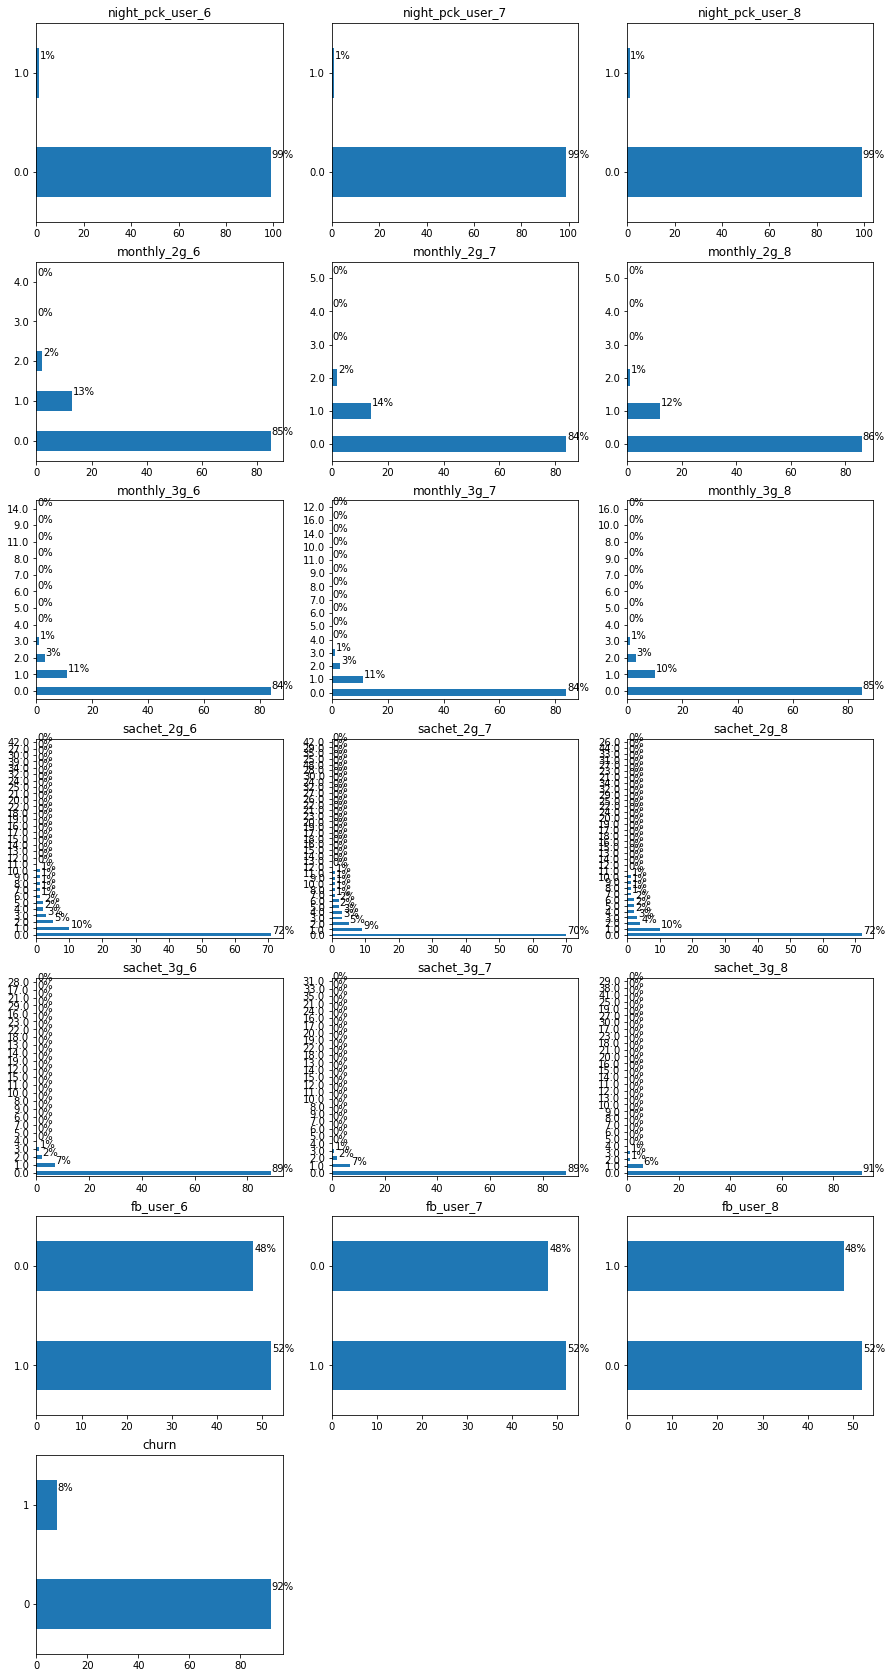

In [55]:
plt.figure(figsize=(15, 30))
for col in enumerate(cat_columns):
    plt.subplot(len(cat_columns)//3+1, 3, col[0]+1)
    ax = churn_filtered[col[1]].value_counts(normalize=True).mul(100).round(0).plot.barh()
    
    totals =[]
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    
    for p in ax.patches:
        ax.text(p.get_width()+.3, p.get_y()+.39, \
            str(int((p.get_width()/total)*100))+'%')
    plt.title(col[1])
plt.show()

### <font color = purple>Observations
<font color = purple>1. Variables related with night pack users have 99% class imbalance and can be dropped
2. The monthly and sachet scheme users have multiple categories. The lower % categories can be clubbed into a single group. Since these categories are nominal, we should dummify them 

### 7.4. Dropping low-variance columns observed in Univariate Analysis for Categorical variables

In [56]:
night_cols = churn_filtered.columns[churn_filtered.columns.str.contains('night')]
night_cols

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], dtype='object')

In [57]:
churn_filtered.drop(night_cols, axis=1, inplace=True)
churn_filtered.shape

(30001, 133)

### 7.5. Grouping categories in variables with multiple categories

In [58]:
monthly_cols = churn_filtered.columns[churn_filtered.columns.str.contains('monthly')]
monthly_cols

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8'],
      dtype='object')

In [59]:
sachet_cols = churn_filtered.columns[churn_filtered.columns.str.contains('sachet')]
sachet_cols

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [60]:
vars = list(monthly_cols) + list(sachet_cols)

for var in vars:
    val_cts = churn_filtered[var].value_counts(normalize=True).mul(100).round(1)
    print(var)
    print(val_cts,'\n')

monthly_2g_6
0.0    84.6
1.0    13.4
2.0     1.8
3.0     0.1
4.0     0.0
Name: monthly_2g_6, dtype: float64 

monthly_2g_7
0.0    84.1
1.0    13.6
2.0     2.2
3.0     0.1
4.0     0.0
5.0     0.0
Name: monthly_2g_7, dtype: float64 

monthly_2g_8
0.0    86.2
1.0    12.5
2.0     1.2
3.0     0.1
4.0     0.0
5.0     0.0
Name: monthly_2g_8, dtype: float64 

monthly_3g_6
0.0     84.5
1.0     11.4
2.0      2.8
3.0      0.8
4.0      0.3
5.0      0.1
6.0      0.0
7.0      0.0
8.0      0.0
11.0     0.0
9.0      0.0
14.0     0.0
Name: monthly_3g_6, dtype: float64 

monthly_3g_7
0.0     84.4
1.0     11.0
2.0      3.4
3.0      0.8
4.0      0.2
5.0      0.1
6.0      0.1
7.0      0.0
8.0      0.0
9.0      0.0
11.0     0.0
10.0     0.0
14.0     0.0
16.0     0.0
12.0     0.0
Name: monthly_3g_7, dtype: float64 

monthly_3g_8
0.0     85.3
1.0     10.4
2.0      2.9
3.0      0.7
4.0      0.3
5.0      0.1
6.0      0.0
7.0      0.0
9.0      0.0
8.0      0.0
10.0     0.0
16.0     0.0
Name: monthly_3g_8, dtype:

In [61]:
# Clubbing categories in these variables
for var in vars:
    val_cts = churn_filtered[var].value_counts(normalize=True)
    # Clubbing categories with fewer than 3% values
    for cat in val_cts[val_cts<0.03].index:
        churn_filtered.loc[churn_filtered[var]==cat, [var]] = 'Others'

for var in vars:
    val_cts = churn_filtered[var].value_counts(normalize=True).mul(100).round(1)
    print(var)
    print(val_cts,'\n')

monthly_2g_6
0.0       84.6
1.0       13.4
Others     2.0
Name: monthly_2g_6, dtype: float64 

monthly_2g_7
0.0       84.1
1.0       13.6
Others     2.3
Name: monthly_2g_7, dtype: float64 

monthly_2g_8
0.0       86.2
1.0       12.5
Others     1.4
Name: monthly_2g_8, dtype: float64 

monthly_3g_6
0.0       84.5
1.0       11.4
Others     4.1
Name: monthly_3g_6, dtype: float64 

monthly_3g_7
0.0       84.4
1.0       11.0
2.0        3.4
Others     1.3
Name: monthly_3g_7, dtype: float64 

monthly_3g_8
0.0       85.3
1.0       10.4
Others     4.2
Name: monthly_3g_8, dtype: float64 

sachet_2g_6
0.0       70.9
Others    10.7
1.0       10.3
2.0        5.0
3.0        3.1
Name: sachet_2g_6, dtype: float64 

sachet_2g_7
0.0       70.0
Others    15.9
1.0        9.3
2.0        4.8
Name: sachet_2g_7, dtype: float64 

sachet_2g_8
0.0       71.5
Others    13.7
1.0       10.3
2.0        4.5
Name: sachet_2g_8, dtype: float64 

sachet_3g_6
0.0       89.2
1.0        7.3
Others     3.5
Name: sachet_3g_6, 

### 7.6. Bivariate Analysis: Analyzing variables that impact churn

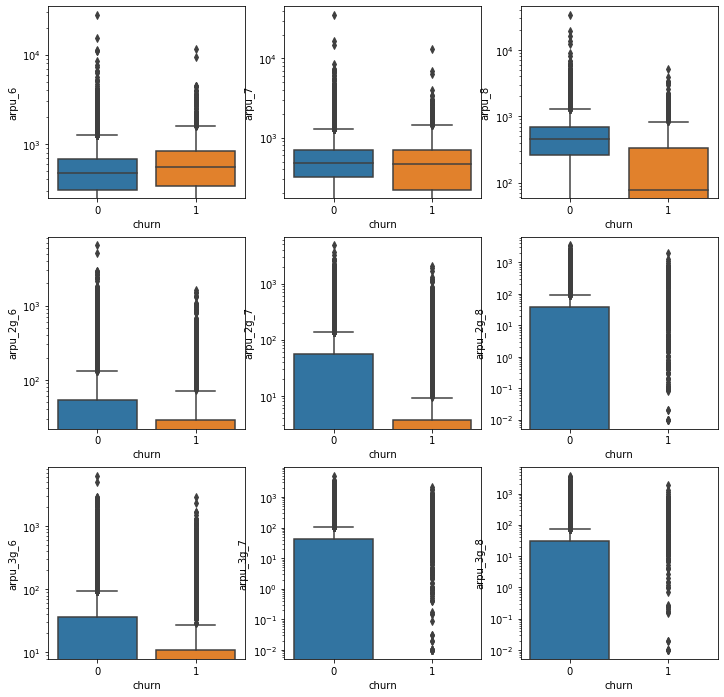

In [62]:
# ARPU-related variables
vars_list = [['arpu_6', 'arpu_7', 'arpu_8'], ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']]

plt.figure(figsize=(12, 12))
for l in enumerate(vars_list):
    for vars in enumerate(l[1]): 
        plt.subplot(3,3, l[0]*3 + vars[0] + 1)
        sns.boxplot(y=churn_filtered[vars[1]], x=churn_filtered.churn)
        plt.yscale('log')
plt.show()

### <font color = purple>Observations
<font color = purple>The ARPU clearly for month 8 is clearly lower for churned customers. The results are not that clear in the 2G and 3G data ARPU    

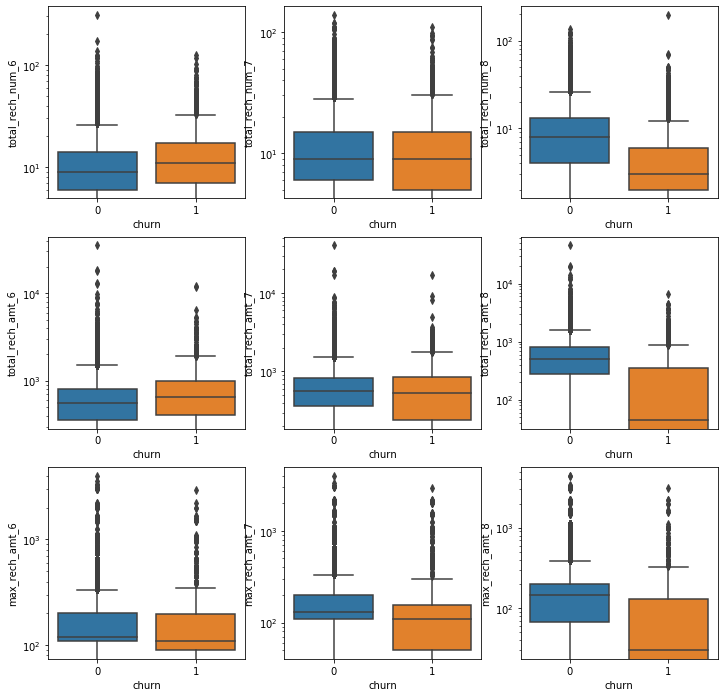

In [63]:
# Recharge-related variables
vars_list = [['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'], \
             ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'], \
             ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'] \
            ]

plt.figure(figsize=(12, 12))
for l in enumerate(vars_list):
    for vars in enumerate(l[1]): 
        plt.subplot(3,3, l[0]*3 + vars[0] + 1)
        sns.boxplot(y=churn_filtered[vars[1]], x=churn_filtered.churn)
        plt.yscale('log')
plt.show()

### <font color = purple>Observations
<font color = purple>Total recharge number, total recharge amount and max recharge amount are clearly lower over the months and very low in month 8 for churned vs retained customers

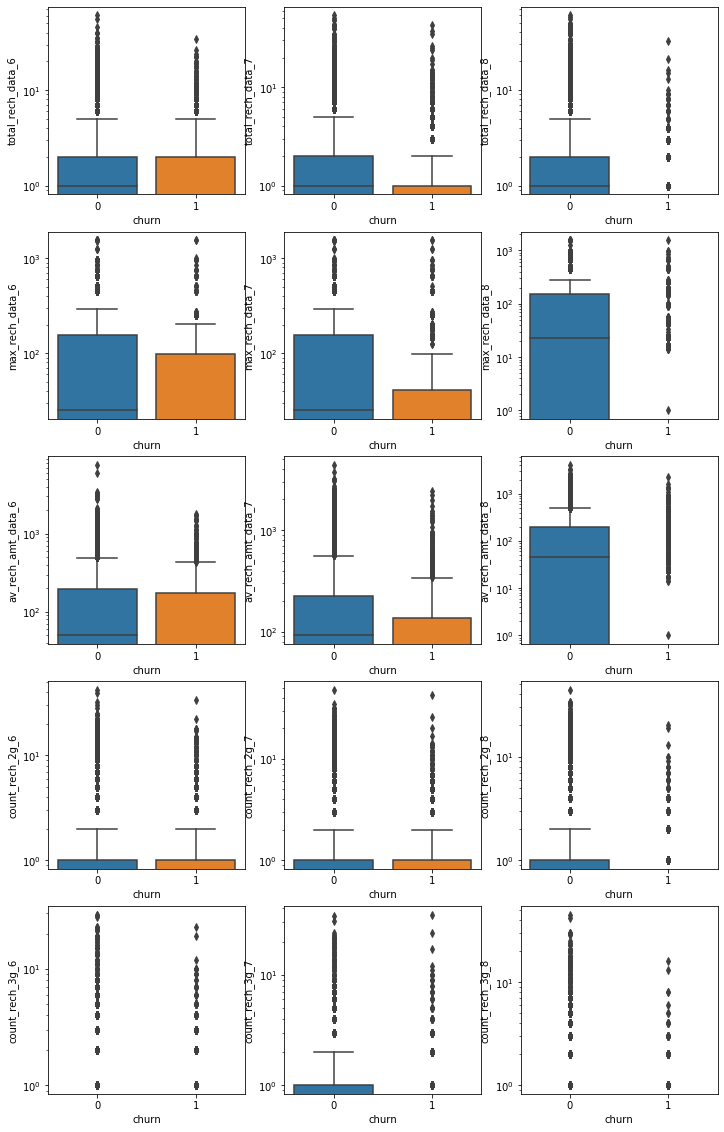

In [64]:
# Data Recharge-related variables
vars_list = [['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'], \
             ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'], \
             ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], \
             ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8'], \
             ['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']
            ]

plt.figure(figsize=(12, 20))
for l in enumerate(vars_list):
    for vars in enumerate(l[1]): 
        plt.subplot(5, 3, l[0]*3 + vars[0] + 1)
        sns.boxplot(y=churn_filtered[vars[1]], x=churn_filtered.churn)
        plt.yscale('log')
plt.show()

### <font color = purple>Observations
<font color = purple>Total recharge data, max recharge data, avg recharge data amount, count recharge 2G are clearly lower over the months for churned vs retained customers

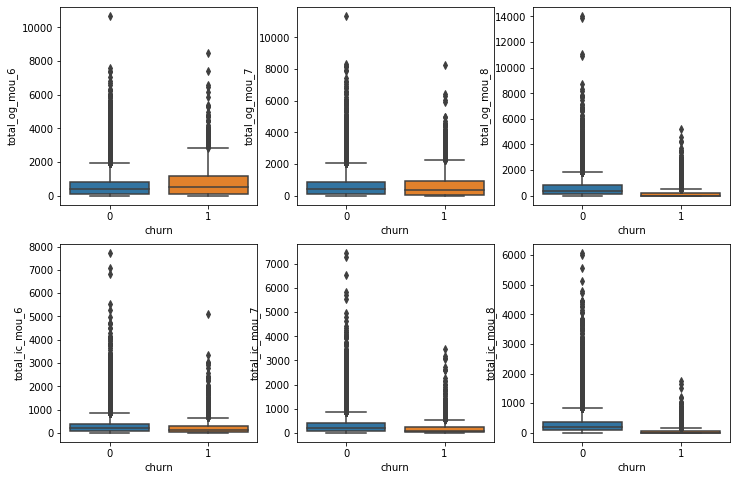

In [65]:
# Minutes of Usage-related variables
vars_list = [
    ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'],\
    ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
            ]

plt.figure(figsize=(12, 8))
for l in enumerate(vars_list):
    for vars in enumerate(l[1]): 
        plt.subplot(2,3, l[0]*3 + vars[0] + 1)
        sns.boxplot(y=churn_filtered[vars[1]], x=churn_filtered.churn)
plt.show()

### <font color = purple>Observations
<font color = purple>Total outgoing and incoming usages are clearly lower over the months and very low in month 8 for churned vs retained customers

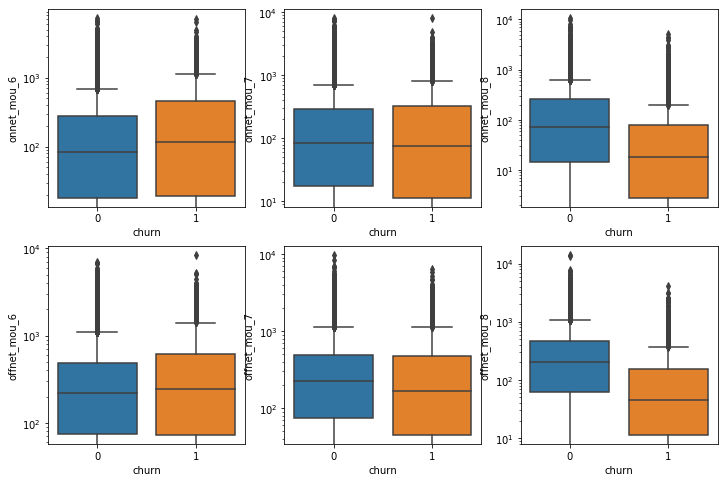

In [66]:
# Onnet and Offnet Usage-related variables
vars_list = [
    ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'],\
    ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
            ]

plt.figure(figsize=(12, 8))
for l in enumerate(vars_list):
    for vars in enumerate(l[1]): 
        plt.subplot(2,3, l[0]*3 + vars[0] + 1)
        sns.boxplot(y=churn_filtered[vars[1]], x=churn_filtered.churn)
        plt.yscale('log')
plt.show()

### <font color = purple>Observations
<font color = purple>Onnet and Offnet usages are clearly lower over the months and very low in month 8 for churned vs retained customers

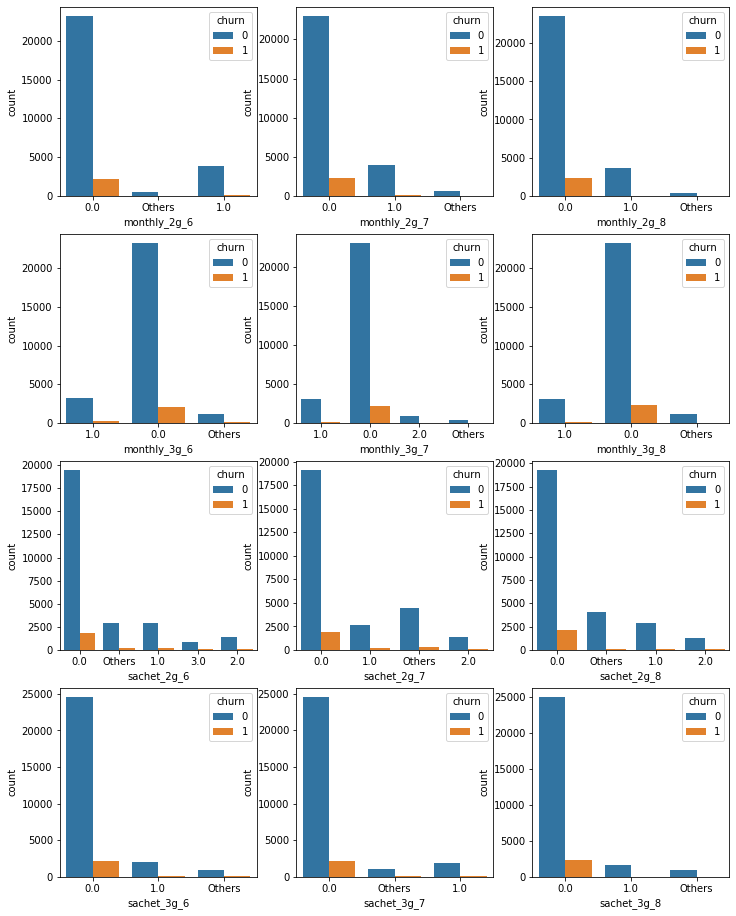

In [67]:
# 2G/3G-related variables
vars_list = [
    ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'],\
    ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], \
    ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8'], \
    ['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
            ]

plt.figure(figsize=(12, 16))
for l in enumerate(vars_list):
    for vars in enumerate(l[1]): 
        plt.subplot(4, 3, l[0]*3 + vars[0] + 1)
        sns.countplot(churn_filtered[vars[1]], hue=churn_filtered.churn)
plt.show()

### <font color = purple>Observations
<font color = purple>No discernible pattern between churned and retained customers from the schemes above

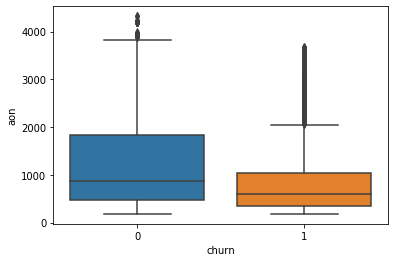

In [68]:
# Age of network
sns.boxplot(y=churn_filtered.aon, x=churn_filtered.churn)
plt.show()

### <font color = purple>Observations
<font color = purple>Churned customers have spent lesser time on the network

### 7.7. Dropping aggregate columns discovered previously

In [69]:
cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', \
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', \
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', \
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', \
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', \
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', \
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', \
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'
       ]

In [70]:
churn_filtered.drop(cols, inplace=True, axis=1)
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_since_rech,days_since_rech_data,churn
0,197.385,214.816,213.803,1.658,1.958,0.00,8.652,19.696,0.00,0.00,3.688,0.00,0.0,0.0,0.00,0.00,3.092,0.00,0.00,11.558,0.00,0.00,5.376,0.00,0.0,0.0,0.00,37.096,18.02,0.16,30.026,31.714,4.13,1.446,1.904,1.15,3.238,3.198,0.00,20.142,12.242,0.00,0.00,0.00,0.00,0.04,0.0,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,54.0,54.0,1
1,1069.180,1349.850,3171.480,51.390,31.380,40.28,308.630,447.380,162.28,62.13,55.140,53.23,0.0,0.0,0.00,4.30,23.290,12.01,49.89,31.760,49.14,6.66,20.080,16.68,4.5,0.0,6.50,58.140,32.26,27.31,217.560,221.490,121.19,152.160,101.460,39.53,36.890,11.830,30.39,91.440,126.990,141.33,52.19,34.24,22.21,0.21,0.0,0.0,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,36.0,99999.0,1
2,378.721,492.223,137.362,297.130,217.590,12.49,80.960,70.580,50.54,0.00,0.000,0.00,0.0,0.0,7.15,116.56,133.430,22.58,13.69,10.040,75.69,0.00,0.000,0.00,0.0,0.0,10.23,23.840,9.84,0.31,57.580,13.980,15.48,0.000,0.000,0.00,0.000,0.580,0.10,22.430,4.080,0.65,0.00,0.00,0.00,0.00,0.0,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0,1,0,0,1,Others,0,0,0,0,0,0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,32.0,39.0,0
3,514.453,597.753,637.760,4.480,6.160,23.34,91.810,87.930,104.81,0.75,0.000,1.58,0.0,0.0,0.00,97.93,125.940,61.79,665.36,808.740,876.99,0.00,0.000,0.00,0.0,0.0,0.00,2.480,10.19,19.54,118.230,74.630,129.16,4.610,2.840,10.39,14.060,5.980,0.18,67.690,38.230,101.74,0.00,0.00,0.00,0.00,0.0,0.0,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,31.0,99999.0,0
4,74.350,193.897,366.966,48.960,50.660,33.58,82.940,83.010,148.56,0.00,0.000,0.00,0.0,0.0,17.71,0.00,0.000,0.00,2.36,6.350,39.61,0.00,0.000,0.00,0.1,0.0,17.71,20

In [71]:
churn_filtered.shape

(30001, 109)

### 7.8. Checking correlation matrix

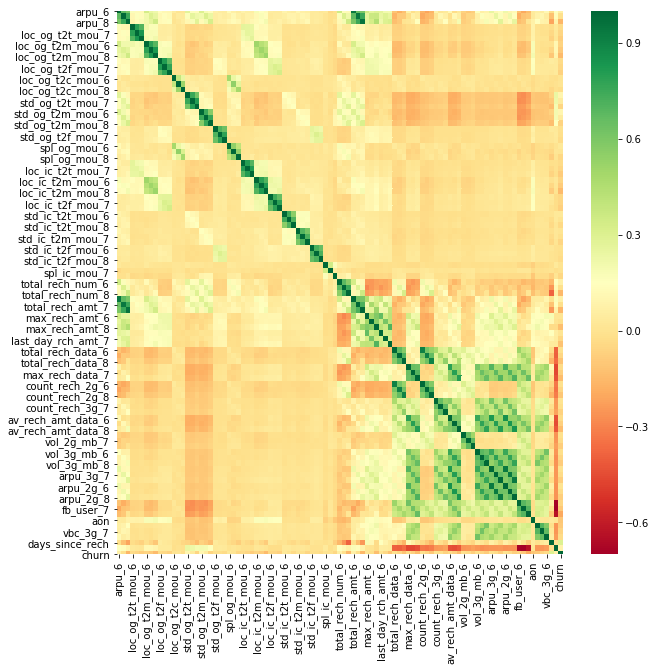

In [72]:
# Checking correlations between variables
plt.figure(figsize=(10,10))
sns.heatmap(churn_filtered.corr(), cmap='RdYlGn')

In [73]:
# Getting top correlations in the dataset
cor = churn_filtered.corr().abs()

cor = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
unstacked_corr = cor.unstack().reset_index()
unstacked_corr.columns = ['VAR1', 'VAR2', 'Correlation']
unstacked_corr.dropna(subset=['Correlation'], inplace=True)
unstacked_corr['Correlation'] = round(unstacked_corr['Correlation'], 2)
unstacked_corr.sort_values(by='Correlation', ascending=False).head(25)

,VAR1,VAR2,Correlation
5143,total_rech_amt_8,arpu_8,0.96
4947,total_rech_amt_6,arpu_6,0.95
8327,arpu_2g_7,arpu_3g_7,0.94
8425,arpu_2g_8,arpu_3g_8,0.94
8229,arpu_2g_6,arpu_3g_6,0.94
5045,total_rech_amt_7,arpu_7,0.94
6658,count_rech_2g_8,total_rech_data_8,0.91
6560,count_rech_2g_7,total_rech_data_7,0.91
6462,count_rech_2g_6,total_rech_data_6,0.91
8220,arpu_2g_6,av_rech_amt_data_6,0.85


### <font color = purple>Observations
<font color = purple>There are multiple highly correlated features which should be dropped to make the models stable. We will retain the rech amount columns and drop arpu and count rech columns. Between arpu_2g and arpu_3g, we will only retain the latter.

In [74]:
churn_filtered.corr()['churn'].sort_values(ascending=False)

churn                   1.000000
days_since_rech         0.300582
std_og_t2m_mou_6        0.098265
std_og_t2t_mou_6        0.090749
days_since_rech_data    0.078468
arpu_6                  0.067624
total_rech_amt_6        0.066826
total_rech_num_6        0.064596
std_og_t2m_mou_7        0.045122
std_og_t2t_mou_7        0.038126
spl_og_mou_6            0.025199
std_ic_t2t_mou_6        0.024759
last_day_rch_amt_6      0.007169
std_ic_t2m_mou_6        0.007163
spl_og_mou_7            0.005310
loc_og_t2c_mou_7        0.004915
max_rech_amt_6          0.004511
count_rech_3g_6         0.003688
std_ic_t2t_mou_7        0.002063
loc_og_t2c_mou_6        0.001445
spl_ic_mou_6            0.001431
arpu_2g_6              -0.000050
arpu_3g_6              -0.002283
spl_ic_mou_7           -0.003517
total_rech_num_7       -0.010208
total_rech_data_6      -0.010847
std_ic_t2m_mou_7       -0.011266
std_og_t2f_mou_6       -0.012242
arpu_7                 -0.012789
vol_2g_mb_6            -0.013302
count_rech

### <font color = purple>Observations
<font color = purple>1. Days since recharge have a strong positive correlation with churn implying as the days since recharge increase so does the probability of churn
2. Fb usage, recharge amount, local incoming and outgoing calling in the action month have a negative correlation with churn implying that it is likely that the more a customer uses and recharges the phone in the action 8, the less likely the customer is to churn
3. As age on network increases, probability of churn decreases

### 7.9. Dropping variables with high correlations

In [75]:
cols_drop_2 = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', \
               'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']

In [76]:
churn_filtered.drop(cols_drop_2, axis=1, inplace=True)

In [77]:
# Recomputing num_columns
for col in cols:
    num_columns.remove(col)
    
for col in cols_drop:
    num_columns.remove(col)
    
for col in cols_drop_2:
    num_columns.remove(col)

num_columns

['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt

In [78]:
cat_cols = ["monthly_2g_6", "monthly_3g_6", "sachet_2g_6", "sachet_3g_6",\
           "monthly_2g_7", "monthly_3g_7", "sachet_2g_7", "sachet_3g_7", \
           "monthly_2g_8", "monthly_3g_8", "sachet_2g_8", "sachet_3g_8"]
cat_cols

['monthly_2g_6',
 'monthly_3g_6',
 'sachet_2g_6',
 'sachet_3g_6',
 'monthly_2g_7',
 'monthly_3g_7',
 'sachet_2g_7',
 'sachet_3g_7',
 'monthly_2g_8',
 'monthly_3g_8',
 'sachet_2g_8',
 'sachet_3g_8']

## 8. Data Preparation
1. One-hot encoding Categorical columns
2. Outlier Treatment
3. Deriving new features
4. Managing class imbalance with Smoting
5. Splitting the dataset into Train-test
6. Scaling the dataset

### 8.1. One-hot encoding Categorical columns

In [79]:
# One Hot Encoding of Categorical variables
for col in cat_cols:
    temp_df = pd.get_dummies(churn_filtered[col], prefix=col, drop_first=True)
    churn_filtered = pd.concat([churn_filtered, temp_df], axis=1)
    churn_filtered.drop(col, axis=1, inplace=True)
churn_filtered.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_since_rech,days_since_rech_data,churn,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others
0,1.658,1.958,0.00,8.652,19.696,0.00,0.00,3.688,0.00,0.0,0.0,0.00,0.00,3.092,0.00,0.00,11.558,0.00,0.00,5.376,0.00,0.0,0.0,0.00,37.096,18.02,0.16,30.026,31.714,4.13,1.446,1.904,1.15,3.238,3.198,0.00,20.142,12.242,0.00,0.00,0.00,0.00,0.04,0.0,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,1.0,1.0,1.0,968.0,30.40,0.00,101.20,54.0,54.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,51.390,31.380,40.28,308.630,447.380,162.28,62.13,55.140,53.23,0.0,0.0,0.00,4.30,23.290,12.01,49.89,31.760,49.14,6.66,20.080,16.68,4.5,0.0,6.50,58.140,32.26,27.31,217.560,221.490,121.19,152.160,101.460,39.53,36.890,11.830,30.39,91.440,126.990,141.33,52.19,34.24,22.21,0.21,0.0,0.0,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,802.0,57.74,19.38,18.74,36.0,99999.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,297.130,217.590,12.49,80.960,70.580,50.54,0.00,0.000,0.00,0.0,0.0,7.15,116.56,133.430,22.58,13.69,10.040,75.69,0.00,0.000,0.00,0.0,0.0,10.23,23.840,9.84,0.31,57.580,13.980,15.48,0.000,0.000,0.00,0.000,0.580,0.10,22.430,4.080,0.65,0.00,0.00,0.00,0.00,0.0,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.0,1.0,1.0,315.0,21.03,910.65,122.16,32.0,39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4.480,6.160,23.34,91.810,87.930,104.81,0.75,0.000,1.58,0.0,0.0,0.00,97.93,125.940,61.79,665.36,808.740,876.99,0.00,0.000,0.00,0.0,0.0,0.00,2.480,10.19,19.54,118.230,74.630,129.16,4.610,2.840,10.39,14.060,5.980,0.18,67.690,38.230,101.74,0.00,0.00,0.00,0.00,0.0,0.0,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,720.0,0.00,0.00,0.00,31.0,99999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 8.2. Outlier removal

In [80]:
churn_filtered.describe()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_since_rech,days_since_rech_data,churn,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,84.695092,85.884403,78.485937,163.850373,163.568904,152.757516,6.378294,6.453575,5.935371,1.593891,1.906435,1.737712,166.422022,174.385167,148.848349,179.988979,188.207075,157.941327,1.818269,1.838947,1.596243,5.873603,7.157980,6.660723,65.697224,66.886643,63.119317,151.131422,152.332451,147.704178,15.359016,16.111528,14.540967,14.962213,15.473203,14.006173,29.342616,30.942243,28.146354,2.718171,2.815458,2.585987,0.062164,0.020564,0.027440,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,100.893604,100.356021,92.393654,1.667711,1.853805,1.62191

In [81]:
def outlier_treatment(a):
    IQR = a.quantile(0.75) - a.quantile(0.25)
    upper_limit = a.quantile(0.75) + 1.5 * IQR
    lower_limit = a.quantile(0.25) - 1.5 * IQR
    a[a<lower_limit] = lower_limit
    a[a>upper_limit] = upper_limit
    return a

In [82]:
# Outlier Treatment for numerical columns
churn_filtered[num_columns] = churn_filtered[num_columns].apply(outlier_treatment, axis=0)

In [83]:
churn_filtered.describe()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_since_rech,days_since_rech_data,churn,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,52.080919,52.419033,48.097721,138.723126,139.689812,129.677750,2.705794,2.798883,2.525940,0.037299,0.129619,0.123410,70.183419,73.828205,49.996212,99.947526,102.887587,76.288745,0.0,0.0,0.0,3.305852,4.379801,3.936279,45.737673,46.425953,43.694735,129.153604,130.637626,126.432802,7.835062,8.057044,7.431345,5.275032,5.521868,4.561024,15.576230,16.367700,14.288146,0.121553,0.151803,0.128711,0.0,0.0,0.0,11.235742,11.087764,9.353055,629.705876,628.387720,554.302157,147.430352,148.834006,146.066498,87.084264,88.290224,82.446352,1.322189,1.430252,1.255358,74.812273,76.455251,69.541482,0.0,0.0,0.0,119.289991,127.687875,110.065144,52.300191,4

### <font color = purple>Observations
<font color = purple>We have tackled the columns outliers in continuous columns

In [84]:
churn_copy = churn_filtered.copy()

### 8.3. Deriving the features

The months 6 and 7 are similar for most columns and are described as the good phase. Therefore, we will take an average of values across columns to reduce dimensionality

In [85]:
fb_user_cols = ["fb_user_6", "fb_user_7", "fb_user_8"]

In [86]:
cat_columns = ['monthly_2g_6_1.0',
 'monthly_2g_6_Others',
 'monthly_3g_6_1.0',
 'monthly_3g_6_Others',
 'sachet_2g_6_1.0',
 'sachet_2g_6_2.0',
 'sachet_2g_6_3.0',
 'sachet_2g_6_Others',
 'sachet_3g_6_1.0',
 'sachet_3g_6_Others',
 'monthly_2g_7_1.0',
 'monthly_2g_7_Others',
 'monthly_3g_7_1.0',
 'monthly_3g_7_Others',
 'sachet_2g_7_1.0',
 'sachet_2g_7_2.0',
 'sachet_2g_7_3.0',
 'sachet_2g_7_Others',
 'sachet_3g_7_1.0',
 'sachet_3g_7_Others',
 'monthly_2g_8_1.0',
 'monthly_2g_8_Others',
 'monthly_3g_8_1.0',
 'monthly_3g_8_Others',
 'sachet_2g_8_1.0',
 'sachet_2g_8_2.0',
 'sachet_2g_8_3.0',
 'sachet_2g_8_Others',
 'sachet_3g_8_1.0',
 'sachet_3g_8_Others',
 ]

cat_columns

['monthly_2g_6_1.0',
 'monthly_2g_6_Others',
 'monthly_3g_6_1.0',
 'monthly_3g_6_Others',
 'sachet_2g_6_1.0',
 'sachet_2g_6_2.0',
 'sachet_2g_6_3.0',
 'sachet_2g_6_Others',
 'sachet_3g_6_1.0',
 'sachet_3g_6_Others',
 'monthly_2g_7_1.0',
 'monthly_2g_7_Others',
 'monthly_3g_7_1.0',
 'monthly_3g_7_Others',
 'sachet_2g_7_1.0',
 'sachet_2g_7_2.0',
 'sachet_2g_7_3.0',
 'sachet_2g_7_Others',
 'sachet_3g_7_1.0',
 'sachet_3g_7_Others',
 'monthly_2g_8_1.0',
 'monthly_2g_8_Others',
 'monthly_3g_8_1.0',
 'monthly_3g_8_Others',
 'sachet_2g_8_1.0',
 'sachet_2g_8_2.0',
 'sachet_2g_8_3.0',
 'sachet_2g_8_Others',
 'sachet_3g_8_1.0',
 'sachet_3g_8_Others']

In [87]:
# Creating an avg values for numerical variables in June and July
cols = []

for col in churn_filtered.columns:
    if col[-1] == "6" and col not in fb_user_cols:
        cols.append(col)

for col in cols:
    st_av = col + "_7_avg"
    st_7 = col[:-1] + "7"
    churn_filtered[st_av] = (churn_filtered[col] + churn_filtered[st_7])/2
    
churn_filtered.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_since_rech,days_since_rech_data,churn,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2f_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,std_og_t2f_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2t_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,std_ic_t2m_mou_6_7_avg,std_ic_t2f_mou_6_7_avg,spl_ic_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,count_rech_3g_6_7_avg,av_rech_amt_data_6_7_avg,vol_2g_mb_6_7_avg,vol_3g_mb_6_7_avg,arpu_3g_6_7_avg,vbc_3g_6_7_avg
0,1.658,1.958,0.00,8.652,19.696,0.00,0.000,3.688,0.000,0.0,0.0,0.0,0.00,3.092,0.00,0.000,11.558,0.000,0.0,0.0,0.0,0.0,0.0,0.000,37.096,18.02,0.16,30.026,31.714,4.13,1.446,1.904,1.150,3.238,3.198,0.00,20.142,12.242,0.00,0.0,0.000,0.000,0.0,0.0,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,252.0,252.0,252.0,30.13,1.320,5.75,83.57,150.76,109.610,87.5,89.225,52.30,1.0,1.0,1.0,968.0,30.40,0.000,101.20,44.5,54.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.8080,14.174,1.8440,0.0,1.546,5.7790,0.0,0.00,27.558,30.870,1.6750,3.218,16.192,0.0000,0.0,3.5,307.0,252.0,252.0,1.0,252.0,0.0,252.0,15.7250,117.165,88.3625,50.6000
1,51.390,31.380,40.28,308.630,447.380,162.28,10.725,11.100,10.075,0.0,0.0,0.0,4.30,23.290,12.01,49.890,31.760,49.140,0.0,0.0,0.0,4.5,0.0,6.500,58.140,32.26,27.31,217.560,221.490,121.19,30.325,30.950,28.575,20.850,11.830,18.15,59.350,62.650,55.10,0.5,0.625,0.525,0.0,0.0,0.0,5.0,5.0,7.0,1545.0,790.0,1565.0,335.0,335.0,420.0,0.0,0.0,325.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.0,0.0,802.0,57.74,19.380,18.74,36.0,99999.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.3850,378.005,10.9125,0.0,13.795,40.8250,0.0,2.25,45.200,219.525,30.6375,16.340,61.000,0.5625,0.0,5.0,1167.5,335.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,19.0600
2,187.810,188.765,12.49,80.960,70.580,50.54,0.000,0.000,0.000,0.0,0.0,0.5,116.56,133.430,22.58,13.690,10.040,75.690,0.0,0.0,0.0,0

In [88]:
# Dropping numerical columns for June and July, retaining only averages
churn_filtered.drop(cols, axis=1, inplace=True)

cols_7 = []
for col in cols:
    cols_7.append(col[:-1] + "7")
    
churn_filtered.drop(cols_7, axis=1, inplace=True)

In [89]:
churn_filtered.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,days_since_rech,days_since_rech_data,churn,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2f_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,std_og_t2f_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2t_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,std_ic_t2m_mou_6_7_avg,std_ic_t2f_mou_6_7_avg,spl_ic_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,count_rech_3g_6_7_avg,av_rech_amt_data_6_7_avg,vol_2g_mb_6_7_avg,vol_3g_mb_6_7_avg,arpu_3g_6_7_avg,vbc_3g_6_7_avg
0,0.00,0.00,0.000,0.0,0.00,0.000,0.0,0.000,0.16,4.13,1.150,0.00,0.00,0.000,0.0,2.0,252.0,252.0,252.0,1.0,252.0,0.0,252.0,5.75,109.610,52.30,1.0,1.0,1.0,968.0,30.40,44.5,54.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.8080,14.174,1.8440,0.0,1.546,5.7790,0.0,0.00,27.558,30.870,1.6750,3.218,16.192,0.0000,0.0,3.5,307.0,252.0,252.0,1.0,252.0,0.0,252.0,15.7250,117.165,88.3625,50.6000
1,40.28,162.28,10.075,0.0,12.01,49.140,0.0,6.500,27.31,121.19,28.575,18.15,55.10,0.525,0.0,7.0,1565.0,420.0,325.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,802.0,57.74,36.0,99999.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.3850,378.005,10.9125,0.0,13.795,40.8250,0.0,2.25,45.200,219.525,30.6375,16.340,61.000,0.5625,0.0,5.0,1167.5,335.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,19.0600
2,12.49,50.54,0.000,0.5,22.58,75.690,0.0,10.230,0.31,15.48,0.000,0.10,0.65,0.000,0.0,14.0,120.0,30.0,10.0,3.0,23.0,0.0,69.0,0.03,11.940,19.83,0.0,1.0,1.0,315.0,21.03,32.0,39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,188.2875,75.770,0.0000,0.0,124.995,11.8650,0.0,0.00,16.840,35.780,0.0000,0.290,13.255,0.0000,0.0,20.0,519.0,122.0,25.0,1.0,77.0,0.0,88.5,97.2125,375.475,0.0000,232.6925
3,23.34,104.81,1.580,0.0,61.79,298.225,0.0,0.000,19.54,129.16,10.390,0.18,55.10,0.000,0.0,26.5,718.0,50.0,50.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,720.0,0.00,31.0,99999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.3200,89.870,0.3750,0.0,111.935,394.9375,0.0,0.00,6.335,96.430,3.7250,10.020,48.790,0.0000,0.0,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.0000
4,33.58,148.56,0.000,0.5,0.00,39.610,0.0,15.725,76.64,146.84,0.710,13.38,43.91,0.000,0.0,4.0,439.0,179.0,0.0,2.0,179.0,0.0,270.0,0.01,890.475,52.30,0.0,1.0,1.0,604.0,40.45,38.0,56.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,49.8100,82.975,0.0000,0.0,0.000,4.3550,0.0,0.05,40.875,104.635,0.0000,0.255,8.660,0.0000,0.0,4.0,227.0,89.5,89.5,1.0,89.5,0.0,178.0,0.2400,299.545,44.6125,25.9300


### <font color = purple>Observations
<font color = purple>We now have features with avgs of month 6 and 7 (good phase) and month 8 (test phase)

### 8.4. Managing Class Imbalance with Smoting

In [90]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [91]:
X_smote = pd.DataFrame(X_smote, columns=X.columns)
X_smote.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,days_since_rech,days_since_rech_data,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2f_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,std_og_t2f_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2t_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,std_ic_t2m_mou_6_7_avg,std_ic_t2f_mou_6_7_avg,spl_ic_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,count_rech_3g_6_7_avg,av_rech_amt_data_6_7_avg,vol_2g_mb_6_7_avg,vol_3g_mb_6_7_avg,arpu_3g_6_7_avg,vbc_3g_6_7_avg
0,0.00,0.00,0.000,0.0,0.00,0.000,0.0,0.000,0.16,4.13,1.150,0.00,0.00,0.000,0.0,2.0,252.0,252.0,252.0,1.0,252.0,0.0,252.0,5.75,109.610,52.30,1.0,1.0,1.0,968.0,30.40,44.5,54.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.8080,14.174,1.8440,0.0,1.546,5.7790,0.0,0.00,27.558,30.870,1.6750,3.218,16.192,0.0000,0.0,3.5,307.0,252.0,252.0,1.0,252.0,0.0,252.0,15.7250,117.165,88.3625,50.6000
1,40.28,162.28,10.075,0.0,12.01,49.140,0.0,6.500,27.31,121.19,28.575,18.15,55.10,0.525,0.0,7.0,1565.0,420.0,325.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,802.0,57.74,36.0,99999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.3850,378.005,10.9125,0.0,13.795,40.8250,0.0,2.25,45.200,219.525,30.6375,16.340,61.000,0.5625,0.0,5.0,1167.5,335.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,19.0600
2,12.49,50.54,0.000,0.5,22.58,75.690,0.0,10.230,0.31,15.48,0.000,0.10,0.65,0.000,0.0,14.0,120.0,30.0,10.0,3.0,23.0,0.0,69.0,0.03,11.940,19.83,0.0,1.0,1.0,315.0,21.03,32.0,39.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,188.2875,75.770,0.0000,0.0,124.995,11.8650,0.0,0.00,16.840,35.780,0.0000,0.290,13.255,0.0000,0.0,20.0,519.0,122.0,25.0,1.0,77.0,0.0,88.5,97.2125,375.475,0.0000,232.6925
3,23.34,104.81,1.580,0.0,61.79,298.225,0.0,0.000,19.54,129.16,10.390,0.18,55.10,0.000,0.0,26.5,718.0,50.0,50.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,720.0,0.00,31.0,99999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.3200,89.870,0.3750,0.0,111.935,394.9375,0.0,0.00,6.335,96.430,3.7250,10.020,48.790,0.0000,0.0,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0000,0.0000
4,33.58,148.56,0.000,0.5,0.00,39.610,0.0,15.725,76.64,146.84,0.710,13.38,43.91,0.000,0.0,4.0,439.0,179.0,0.0,2.0,179.0,0.0,270.0,0.01,890.475,52.30,0.0,1.0,1.0,604.0,40.45,38.0,56.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,49.8100,82.975,0.0000,0.0,0.000,4.3550,0.0,0.05,40.875,104.635,0.0000,0.255,8.660,0.0000,0.0,4.0,227.0,89.5,89.5,1.0,89.5,0.0,178.0,0.2400,299.545,44.6125,25.9300


In [92]:
y_smote = pd.Series(y_smote)

In [93]:
y.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [94]:
y_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

### <font color = purple>Observations
<font color = purple>We have tackled the class imbalance

### 8.5. Splitting the dataset into Train-test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 4)

In [96]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(13780,)

### 8.6. Scaling the continuous variables

In [97]:
X_train.columns

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'arpu_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8',
       'days_since_rech', 'days_since_rech_data', 'monthly_2g_6_1.0',
       'monthly_2g_6_Others', 'monthly_3g_6_1.0', 'monthly_3g_6_Others',
       'sachet_2g_6_1.0', 'sachet_2g_6_2.0', 'sachet_2g_6_3.0',
       'sachet_2g_6_Others', 'sachet_3g_6_1.0', 'sachet_3g_6_Others',
       'monthly_2g_7_1.0', 'monthly_2g_7_Others', 'monthly_3g_7_1.0',
       'monthly_3g_7_2.0', 'monthly_

In [98]:
numeric_columns = ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'aon', 'vbc_3g_8',
       'days_since_rech', 'days_since_rech_data', 
        'loc_og_t2t_mou_6_7_avg',
       'loc_og_t2m_mou_6_7_avg', 'loc_og_t2f_mou_6_7_avg',
       'loc_og_t2c_mou_6_7_avg', 'std_og_t2t_mou_6_7_avg',
       'std_og_t2m_mou_6_7_avg', 'std_og_t2f_mou_6_7_avg',
       'spl_og_mou_6_7_avg', 'loc_ic_t2t_mou_6_7_avg',
       'loc_ic_t2m_mou_6_7_avg', 'loc_ic_t2f_mou_6_7_avg',
       'std_ic_t2t_mou_6_7_avg', 'std_ic_t2m_mou_6_7_avg',
       'std_ic_t2f_mou_6_7_avg', 'spl_ic_mou_6_7_avg',
       'total_rech_num_6_7_avg', 'total_rech_amt_6_7_avg',
       'max_rech_amt_6_7_avg', 'last_day_rch_amt_6_7_avg',
       'total_rech_data_6_7_avg', 'max_rech_data_6_7_avg',
       'count_rech_3g_6_7_avg', 'av_rech_amt_data_6_7_avg',
       'vol_2g_mb_6_7_avg', 'vol_3g_mb_6_7_avg', 'arpu_3g_6_7_avg',
       'vbc_3g_6_7_avg']

In [99]:
X_train.describe()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,days_since_rech,days_since_rech_data,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2f_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,std_og_t2f_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2t_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,std_ic_t2m_mou_6_7_avg,std_ic_t2f_mou_6_7_avg,spl_ic_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,count_rech_3g_6_7_avg,av_rech_amt_data_6_7_avg,vol_2g_mb_6_7_avg,vol_3g_mb_6_7_avg,arpu_3g_6_7_avg,vbc_3g_6_7_avg
count,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.0,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.0,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.0,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.0,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.0,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.0,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000
mean,32.368116,86.220705,1.774850,0.128339,41.536336,60.767291,0.0,3.259759,30.211824,85.934267,5.273920,3.670077,10.702952,0.102058,0.0,7.353139,407.382329,110.995373,56.981311,0.831331,46.425287,0.0,71.945072,20.875833,131.958387,8.527382,0.472395,0.440936,0.319557,1043.884431,50.859668,36.564616,36177.810113,0.077213,0.011079,0.078689,0.026947,0.063643,0.027842,0.017610,0.078254,0.044291,0.022545,0.077262,0.012337,0.070610,0.019715,0.007837,0.056217,0.027504,0.107547,0.039913,0.024020,0.069279,0.007547,0.063159,0.025351,0.064828,0.024843,0.076004,0.030455,0.018771,43.555780,114.292849,2.188455,0.089202,83.429642,113.757013,0.0,3.899929,39.005516,107.667501,6.256641,5.616789,15.680230,0.113958,0.0,11.377004,636.572849,139.274515,80.738515,1.241891,64.686906,0.0,106.814716,45.347378,183.492929,19.143222,58.341551
std,49.619122,125.575145,3.161734,0.195368,70.137231,99.583201,0.0,4.803090,42.282987,111.212802,8.585952,5.861964,16.438668,0.190606,0.0,6.544926,419.545378,107.557331,80.857416,1.400799,85.242300,0.0,126.702358,42.522181,285.903595,18.452658,0.486429,0.481774,0.459055,881.225023,106.741958,4.329797,48011.305925,0.266933,0.104673,0.269256,0.161931,0.244119,0.164523,0.131531,0.268573,0.205744,0.148449,0.267010,0.110385,0.256175,0.139019

In [100]:
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_train.describe()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,days_since_rech,days_since_rech_data,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2f_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,std_og_t2f_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2t_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,std_ic_t2m_mou_6_7_avg,std_ic_t2f_mou_6_7_avg,spl_ic_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,count_rech_3g_6_7_avg,av_rech_amt_data_6_7_avg,vol_2g_mb_6_7_avg,vol_3g_mb_6_7_avg,arpu_3g_6_7_avg,vbc_3g_6_7_avg
count,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.0,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.0,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.0,4.134000e+04,4.134000e+04,4.134000e+04,41340.000000,41340.000000,41340.000000,41340.000000,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,41340.000000,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.0,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.0,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,41340.0,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04,4.134000e+04
mean,4.198652e-16,-3.074061e-16,-2.184191e-17,1.488247e-16,3.596220e-16,6.194193e-16,0.0,1.336779e-16,4.756986e-17,1.453629e-16,4.007706e-16,1.497163e-16,-1.526678e-16,4.512060e-16,0.0,1.753422e-17,-1.928804e-16,7.213442e-16,-2.549726e-16,-5.789945e-16,3.121341e-16,0.0,-7.670704e-16,-4.034509e-16,2.986461e-15,8.527382,0.472395,0.440936,0.319557,7.583637e-17,1.920652e-15,4.624103e-16,-2.232988e-16,0.077213,0.011079,0.078689,0.026947,0.063643,0.027842,0.017610,0.078254,0.044291,0.022545,0.077262,0.012337,0.070610,0.019715,0.007837,0.056217,0.027504,0.107547,0.039913,0.024020,0.069279,0.007547,0.063159,0.025351,0.064828,0.024843,0.076004,0.030455,0.018771,1.606654e-17,7.069548e-17,-2.882014e-16,-1.814814e-16,-7.103386e-17,-7.347318e-16,0.0,8.376893e-17,1.084388e-16,2.079721e-17,-2.369147e-16,1.806838e-16,9.861353e-17,-5.014749e-16,0.0,-3.701388e-16,-7.437205e-17,-1.717650e-16,-7.062955e-16,2.538850e-16,2.381340e-16,0.0,-3.500116e-16,-2.024613e-16,-2.517472e-16,2.184215e-15,-3.283054e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,1.00

### <font color = purple>Observations
<font color = purple>We have scaled the continuous features

## 9. Modelling
In this step, we will explore various models and assess their perfromance to identify the best model for churn prediction
1. Logistic Regression without PCA for Feature Importance
2. Logistic Regression with PCA
3. Random Forest with PCA
4. XGBoost with PCA

We will later also use SKlearn SelectKBest to identify top features for a classification problem

In [101]:
X_train.shape

(41340, 89)

### 9.1 Logistic Regression without PCA

In [102]:
logistic= LogisticRegression()
rfe = RFE(logistic)
mod = LogisticRegression()

# create pipeline
steps = [("rfe", rfe), ("logistic", mod)
        ]

# compile pipeline
rfe_logreg_pipe = Pipeline(steps)


params = {'rfe__n_features_to_select': [30, 40, 50, 60, 70]}
#           'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
#           'logistic__penalty': ['l1', 'l2']}


gridsearch = GridSearchCV(estimator=rfe_logreg_pipe, param_grid=params, n_jobs=-1, \
                          verbose=1, cv=5, scoring='recall')

In [103]:
# fit model
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=LogisticRegression())),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'rfe__n_features_to_select': [30, 40, 50, 60, 70]},
             scoring='recall', verbose=1)

In [104]:
# cross validation results
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,93.889689,3.380751,0.038202,0.007315,30,{'rfe__n_features_to_select': 30},0.895017,0.904958,0.905200,0.907376,0.904232,0.903356,0.004300,5
1,86.108086,4.796530,0.040309,0.007102,40,{'rfe__n_features_to_select': 40},0.898403,0.917533,0.911004,0.915115,0.908102,0.910031,0.006663,4
2,66.100597,1.308019,0.034419,0.001683,50,{'rfe__n_features_to_select': 50},0.901306,0.917533,0.910278,0.915357,0.907618,0.910418,0.005760,3
3,55.083623,1.845404,0.036096,0.003025,60,{'rfe__n_features_to_select': 60},0.901790,0.918501,0.911245,0.919468,0.908827,0.911966,0.006525,2
4,33.194662,5.447669,0.029617,0.006809,70,{'rfe__n_features_to_select': 70},0.901064,0.919710,0.912213,0.920435,0.911971,0.913079,0.006992,1


In [105]:
# print best hyperparameters
print("Best Recall: ", gridsearch.best_score_)
print("Best hyperparameters: ", gridsearch.best_params_)

Best Recall:  0.9130786488195627
Best hyperparameters:  {'rfe__n_features_to_select': 70}


### <font color = purple>Observations
<font color = purple>The best mean validation score for recall is 91% and best number of features are 70

In [106]:
model1 = gridsearch.best_estimator_
model1

Pipeline(steps=[('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=70)),
                ('logistic', LogisticRegression())])

In [107]:
# predict churn on train data
y_pred_train = model1.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

# check accuracy
acc = accuracy_score(y_train, y_pred_train)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred_train, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob_train = model1.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob_train),2))

[[18652  2014]
 [ 1781 18893]]
Accuracy:    	 0.91
Sensitivity: 	0.91
Specificity: 	0.9
AUC:    	 0.97


In [108]:
y_pred = model1.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model1.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6213  681]
 [ 612 6274]]
Accuracy:    	 0.91
Sensitivity: 	0.91
Specificity: 	0.9
AUC:    	 0.97


### <font color = purple>Observations
<font color = purple>The Logistic Regression model does a good job of explaining the variance in churn. We achieve 91% sensitivity and 97% AUC on the test set. This is likely to get better with non-linear models

#### 9.1.1 Estimating the top features and coefficient

In [109]:
rfe_model = model1.named_steps['rfe']
rfe_model

RFE(estimator=LogisticRegression(), n_features_to_select=70)

In [110]:
rfe_model.n_features_to_select

70

In [111]:
rfe_model.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False])

In [112]:
logistic_model = model1.named_steps['logistic']
logistic_model

LogisticRegression()

In [113]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
intercept_df

,intercept
0,3.418346


In [114]:
logistic_model.coef_

array([[-0.31660599, -0.30871495,  0.14604707, -0.37332968, -0.21577708,
        -0.17260177, -0.69889458, -0.10894933, -0.18870811, -0.29537024,
         0.33141595,  0.1613904 , -0.69572341,  1.14160839,  0.89999912,
        -0.59789628, -0.38809019, -0.32224806,  0.3464243 ,  0.16990334,
         0.26206445, -0.1977862 , -0.29943384,  0.8145738 , -2.90234479,
        -3.81595518, -2.90957137, -4.51802115, -2.08014818, -3.35886571,
        -3.32144958, -4.26865886, -1.90956302, -2.82181716, -2.5367504 ,
        -4.63283463, -2.87390784, -3.82710388, -6.08223527, -2.10799446,
        -3.36841261, -3.98932811, -1.86614664, -2.72272745, -2.94036507,
        -2.13152827, -3.3097482 , -3.21393265, -1.51561747, -2.70661466,
        -4.75379409, -2.18538904, -4.40282038,  0.17324829, -0.25116387,
         0.10452539,  0.16262979,  0.11378285, -0.16106295,  0.41003663,
        -0.11230506,  0.11441598, -0.15763408,  0.58588583, -0.21135705,
        -0.17012983,  2.17336321,  0.69601661,  0.1

In [115]:
# coefficients
coefficients = logistic_model.coef_.reshape((rfe_model.n_features_to_select,1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]
coefficients
logistic_features = list(X_train.columns[rfe_model.support_])
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [116]:
coefficients_df

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,days_since_rech,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,vol_2g_mb_6_7_avg,arpu_3g_6_7_avg
0,-0.316606,-0.308715,0.146047,-0.37333,-0.215777,-0.172602,-0.698895,-0.108949,-0.188708,-0.29537,0.331416,0.16139,-0.695723,1.141608,0.899999,-0.597896,-0.38809,-0.322248,0.346424,0.169903,0.262064,-0.197786,-0.299434,0.814574,-2.902345,-3.815955,-2.909571,-4.518021,-2.080148,-3.358866,-3.32145,-4.268659,-1.909563,-2.821817,-2.53675,-4.632835,-2.873908,-3.827104,-6.082235,-2.107994,-3.368413,-3.989328,-1.866147,-2.722727,-2.940365,-2.131528,-3.309748,-3.213933,-1.515617,-2.706615,-4.753794,-2.185389,-4.40282,0.173248,-0.251164,0.104525,0.16263,0.113783,-0.161063,0.410037,-0.112305,0.114416,-0.157634,0.585886,-0.211357,-0.17013,2.173363,0.696017,0.15799,0.467151


In [117]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2m_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,days_since_rech,monthly_2g_6_1.0,monthly_2g_6_Others,monthly_3g_6_1.0,monthly_3g_6_Others,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_Others,sachet_3g_6_1.0,sachet_3g_6_Others,monthly_2g_7_1.0,monthly_2g_7_Others,monthly_3g_7_1.0,monthly_3g_7_2.0,monthly_3g_7_Others,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_Others,sachet_3g_7_1.0,sachet_3g_7_Others,monthly_2g_8_1.0,monthly_2g_8_Others,monthly_3g_8_1.0,monthly_3g_8_Others,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_Others,sachet_3g_8_1.0,sachet_3g_8_Others,loc_og_t2t_mou_6_7_avg,loc_og_t2m_mou_6_7_avg,loc_og_t2c_mou_6_7_avg,std_og_t2t_mou_6_7_avg,std_og_t2m_mou_6_7_avg,spl_og_mou_6_7_avg,loc_ic_t2m_mou_6_7_avg,loc_ic_t2f_mou_6_7_avg,std_ic_t2t_mou_6_7_avg,total_rech_num_6_7_avg,total_rech_amt_6_7_avg,max_rech_amt_6_7_avg,last_day_rch_amt_6_7_avg,total_rech_data_6_7_avg,max_rech_data_6_7_avg,vol_2g_mb_6_7_avg,arpu_3g_6_7_avg
0,3.418346,-0.316606,-0.308715,0.146047,-0.37333,-0.215777,-0.172602,-0.698895,-0.108949,-0.188708,-0.29537,0.331416,0.16139,-0.695723,1.141608,0.899999,-0.597896,-0.38809,-0.322248,0.346424,0.169903,0.262064,-0.197786,-0.299434,0.814574,-2.902345,-3.815955,-2.909571,-4.518021,-2.080148,-3.358866,-3.32145,-4.268659,-1.909563,-2.821817,-2.53675,-4.632835,-2.873908,-3.827104,-6.082235,-2.107994,-3.368413,-3.989328,-1.866147,-2.722727,-2.940365,-2.131528,-3.309748,-3.213933,-1.515617,-2.706615,-4.753794,-2.185389,-4.40282,0.173248,-0.251164,0.104525,0.16263,0.113783,-0.161063,0.410037,-0.112305,0.114416,-0.157634,0.585886,-0.211357,-0.17013,2.173363,0.696017,0.15799,0.467151


In [118]:
coefficients_df = coefficients_df.transpose().reset_index()

In [119]:
coefficients_df.columns = ['features','coefficient']
coefficients_df

,features,coefficient
0,loc_og_t2t_mou_8,-0.316606
1,loc_og_t2m_mou_8,-0.308715
2,loc_og_t2c_mou_8,0.146047
3,std_og_t2t_mou_8,-0.373330
4,std_og_t2m_mou_8,-0.215777
5,loc_ic_t2t_mou_8,-0.172602
6,loc_ic_t2m_mou_8,-0.698895
7,loc_ic_t2f_mou_8,-0.108949
8,std_ic_t2m_mou_8,-0.188708
9,total_rech_num_8,-0.295370


In [120]:
coefficients_df.reindex(coefficients_df['coefficient'].abs().sort_values(ascending=False).index)

,features,coefficient
38,monthly_3g_7_Others,-6.082235
50,sachet_2g_8_Others,-4.753794
35,monthly_2g_7_Others,-4.632835
27,monthly_3g_6_Others,-4.518021
52,sachet_3g_8_Others,-4.402820
31,sachet_2g_6_Others,-4.268659
41,sachet_2g_7_Others,-3.989328
37,monthly_3g_7_2.0,-3.827104
25,monthly_2g_6_Others,-3.815955
40,sachet_2g_7_2.0,-3.368413


### <font color = purple>Observations
<font color = purple>

1. The top features in churn prediction are the purchase of sachet and monthly packs in months 6,7 and 8. The more packs someone has bought, the lesser likely it is for the person to churn
2. Days since recharge is another important feature. As this time increases, probability of churn increases
3. Activity and recharge amount in action month also has a strong impact on churn. Lower the activity and recharge amount, higher the probability of churn

### 9.2. PCA

In [121]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=42))])

In [122]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [123]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      15.70
1      25.97
2      32.07
3      37.18
4      40.26
5      43.05
6      45.44
7      47.79
8      49.81
9      51.79
10     53.60
11     55.33
12     57.01
13     58.54
14     60.00
15     61.43
16     62.78
17     64.11
18     65.43
19     66.69
20     67.94
21     69.15
22     70.35
23     71.53
24     72.68
25     73.79
26     74.87
27     75.94
28     77.00
29     78.04
30     79.03
31     80.01
32     80.93
33     81.84
34     82.73
35     83.58
36     84.39
37     85.17
38     85.93
39     86.67
40     87.36
41     88.04
42     88.70
43     89.32
44     89.91
45     90.48
46     91.03
47     91.57
48     92.10
49     92.61
50     93.09
51     93.54
52     93.97
53     94.37
54     94.75
55     95.11
56     95.47
57     95.80
58     96.13
59     96.42
60     96.72
61     96.99
62     97.24
63     97.49
64     97.72
65     97.95
66     98.16
67     98.35
68     98.52
69     98.69
70     98.85
71     99.01
72     99.16
73     99.30
74     99.41
75     99.51
76     99.62

~ 45 components explain 90% variance

~ 55 components explain 95% variance

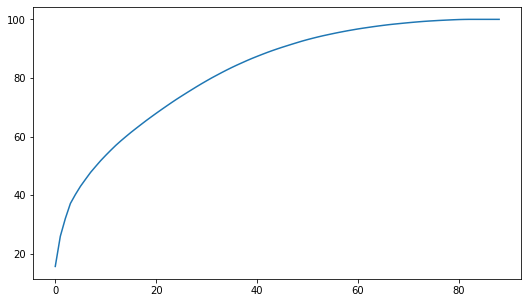

In [124]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### <font color = purple>Observations
<font color = purple>1. Top 45 components explain 90% of variance, with 95% variance explained by 55 components
2. Top 2-3 components explain as high as 37% of variance   

### 9.3. Logistic Regression with PCA

In [125]:
# PCA
pca = PCA(random_state=42)

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [40, 45, 50, 55, 60, 65], 
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10] 
          #'logistic__penalty': ['l1', 'l2']
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
gridsearch = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [126]:
# fit model
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'pca__n_components': [40, 45, 50, 55, 60, 65]},
             scoring='recall', verbose=1)

In [127]:
# cross validation results
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.923537,0.081173,0.047582,0.005200,0.1,40,"{'logistic__C': 0.1, 'pca__n_components': 40}",0.850750,0.852479,0.850302,0.861427,0.860218,0.855035,0.004796,44
1,3.520804,0.109079,0.066981,0.019547,0.1,45,"{'logistic__C': 0.1, 'pca__n_components': 45}",0.851476,0.853688,0.851270,0.862636,0.860459,0.855906,0.004734,33
2,4.034956,0.080020,0.069988,0.015149,0.1,50,"{'logistic__C': 0.1, 'pca__n_components': 50}",0.858974,0.857074,0.858283,0.866022,0.862878,0.860646,0.003317,26
3,4.698636,0.042910,0.080615,0.014734,0.1,55,"{'logistic__C': 0.1, 'pca__n_components': 55}",0.866715,0.863362,0.860943,0.872068,0.866747,0.865967,0.003753,24
4,4.861460,0.104011,0.077508,0.016866,0.1,60,"{'logistic__C': 0.1, 'pca__n_components': 60}",0.879052,0.875212,0.877630,0.885611,0.888029,0.881107,0.004884,16
5,5.251080,0.206103,0.095500,0.008201,0.1,65,"{'logistic__C': 0.1, 'pca__n_components': 65}",0.884615,0.879807,0.879081,0.889480,0.891415,0.884880,0.004966,7
6,3.283939,0.067486,0.066679,0.008701,0.5,40,"{'logistic__C': 0.5, 'pca__n_components': 40}",0.850992,0.852479,0.850302,0.860943,0.860459,0.855035,0.004682,42
7,3.491832,0.183818,0.083379,0.007132,0.5,45,"{'logistic__C': 0.5, 'pca__n_components': 45}",0.851717,0.853204,0.851511,0.862394,0.859976,0.855761,0.004532,34
8,4.480323,0.193422,0.077944,0.018043,0.5,50,"{'logistic__C': 0.5, 'pca__n_components': 50}",0.858491,0.857074,0.858283,0.865538,0.863120,0.860501,0.003254,32
9,5.099579,0.140963,0.066880,0.008681,0.5,55,"{'logistic__C': 0.5, 'pca__n_components': 55}",0.867199,0.863362,0.860943,0.873035,0.867715,0.866451,0.004132,17


In [128]:
# print best hyperparameters
print("Best Recall: ", gridsearch.best_score_)
print("Best hyperparameters: ", gridsearch.best_params_)

Best Recall:  0.8853149246318465
Best hyperparameters:  {'logistic__C': 2, 'pca__n_components': 65}


### <font color = purple>Observations
<font color = purple>The best mean validation score for recall is 88.5% and best number of pca components are 65. The model is taking features which explain around 98% of the variance

In [129]:
model2 = gridsearch.best_estimator_

In [130]:
# predict churn on train data
y_pred_train = model2.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

# check accuracy
acc = accuracy_score(y_train, y_pred_train)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred_train, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob_train = model2.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob_train),2))

[[17784  2882]
 [ 2358 18316]]
Accuracy:    	 0.87
Sensitivity: 	0.89
Specificity: 	0.86
AUC:    	 0.94


In [131]:
# predict churn on test data
y_pred = model2.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model2.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5914  980]
 [ 790 6096]]
Accuracy:    	 0.87
Sensitivity: 	0.89
Specificity: 	0.86
AUC:    	 0.94


### <font color = purple>Observations
<font color = purple>The Logistic Regression model with PCA does a fair explaining the variance in churn. We achieve 89% sensitivity and 94% AUC on the test set. But the specificity is 86%. The model scores are likely to get better with non-linear models    

### 9.4. Random Forest with PCA

In [132]:
# PCA
pca = PCA(random_state=42)

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier()

# create pipeline
steps = [("pca", pca),
         ("forest", forest)
        ]

# compile pipeline
pca_rf = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [50, 60], "forest__max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
gridsearch = GridSearchCV(estimator=pca_rf, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [133]:
# fit model
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  7.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('forest', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'forest__max_features': ['auto', 0.4],
                         'pca__n_components': [50, 60]},
             scoring='recall', verbose=1)

In [134]:
# cross validation results
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__max_features,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,74.982506,1.050859,0.541400,0.023790,auto,50,"{'forest__max_features': 'auto', 'pca__n_compo...",0.945146,0.942679,0.945734,0.944520,0.001324,2
1,62.985478,7.757074,0.560993,0.061794,auto,60,"{'forest__max_features': 'auto', 'pca__n_compo...",0.940212,0.938470,0.940075,0.939586,0.000791,4
2,175.474893,7.202852,0.584227,0.102710,0.4,50,"{'forest__max_features': 0.4, 'pca__n_componen...",0.944420,0.946452,0.947766,0.946213,0.001376,1
3,204.785041,6.215359,0.481281,0.055727,0.4,60,"{'forest__max_features': 0.4, 'pca__n_componen...",0.942679,0.939922,0.943558,0.942053,0.001549,3


In [135]:
# print best hyperparameters
print("Best Recall: ", gridsearch.best_score_)
print("Best hyperparameters: ", gridsearch.best_params_)

Best Recall:  0.9462125591096964
Best hyperparameters:  {'forest__max_features': 0.4, 'pca__n_components': 50}


### <font color = purple>Observations
<font color = purple>The best mean validation score for recall is 94.5% and best number of features are 50

In [136]:
model3 = gridsearch.best_estimator_

In [137]:
# predict churn on train data
y_pred_train = model3.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

# check accuracy
acc = accuracy_score(y_train, y_pred_train)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred_train, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob_train = model3.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob_train),2))

[[20663     3]
 [    0 20674]]
Accuracy:    	 1.0
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0


In [138]:
# predict churn on test data
y_pred = model3.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model3.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6548  346]
 [ 257 6629]]
Accuracy:    	 0.96
Sensitivity: 	0.96
Specificity: 	0.95
AUC:    	 0.99


### <font color = purple>Observations
<font color = purple>The Random Forest model does a very good job of explaining the variance in churn. We achieve 96% sensitivity and 99% AUC on the test set. Even the specificity is high at 95%. The dataset likely had some multicollinearity or non-linear relationships which tree models are capturing better than linear models

### 9.5. XGBoost

In [139]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(X_train)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost = 0.9999379214294213
AUC on test data by XGBoost = 0.994692185832836


In [141]:
# XGboost with PCA
pca = PCA(random_state=42)

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
xbgc = xgb.XGBClassifier()

# create pipeline
steps = [("pca", pca),
         ("xbgc", xbgc)
        ]

# compile pipeline
pca_rf = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [40,60], 'xbgc__learning_rate': [0.3],'xbgc__max_depth': [6,10],'xbgc__min_child_weight': [1],'xbgc__n_estimators': [100,120]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
gridsearch = GridSearchCV(estimator=pca_rf, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [142]:
# fit model
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('xbgc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_s...
                                                    

In [143]:
# print best hyperparameters
print("Best Recall: ", gridsearch.best_score_)
print("Best hyperparameters: ", gridsearch.best_params_)

Best Recall:  0.973493264757565
Best hyperparameters:  {'pca__n_components': 40, 'xbgc__learning_rate': 0.3, 'xbgc__max_depth': 10, 'xbgc__min_child_weight': 1, 'xbgc__n_estimators': 120}


In [144]:
model4 = gridsearch.best_estimator_
model4

Pipeline(steps=[('pca', PCA(n_components=40, random_state=42)),
                ('xbgc',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=120,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [145]:
# predict churn on train data
y_pred_train = model4.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

# check accuracy
acc = accuracy_score(y_train, y_pred_train)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred_train, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob_train = model4.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob_train),2))

[[20666     0]
 [    0 20674]]
Accuracy:    	 1.0
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0


In [146]:
# predict churn on test data
y_pred = model4.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:    \t", round(acc, 2))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 4), "\n", "Specificity: \t", round(specificity, 4), sep='')

# check area under curve
y_pred_prob = model4.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

[[6528  366]
 [  99 6787]]
Accuracy:    	 0.97
Sensitivity: 	0.9856
Specificity: 	0.9469
AUC:    	 0.9938


### <font color = purple>Observations
<font color = purple> 
The XGBoost model does the best job of explaining the variance in churn. We achieve 98.5% sensitivity and 99% AUC on the test set. Even the specificity is the highest at ~95%. The dataset likely had some multicollinearity or non-linear relationships which tree models are capturing better than linear models

### 9.6 Feature Selection

As the models with PCA are unable to explain the top features, we are using SelectKBest from sci-kit learn to understand the top features for a classification from the provided dataset.

In [147]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [148]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit =bestfeatures.fit(X_train, y_train)

In [149]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [150]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Param','Score']

In [151]:
featureScores = featureScores.sort_values(by='Score',ascending=False).reset_index(drop=True)
featureScores

,Param,Score
0,loc_ic_t2m_mou_8,9886.996117
1,total_rech_amt_8,8808.897101
2,days_since_rech,8758.771661
3,loc_og_t2m_mou_8,8648.637146
4,fb_user_8,8121.843555
5,max_rech_amt_8,7198.868705
6,loc_ic_t2t_mou_8,7171.494577
7,loc_og_t2t_mou_8,6990.204000
8,last_day_rch_amt_8,6669.646156
9,total_rech_num_8,6448.819404


In [152]:
num_features = 30
featureScores.iloc[0:num_features]

,Param,Score
0,loc_ic_t2m_mou_8,9886.996117
1,total_rech_amt_8,8808.897101
2,days_since_rech,8758.771661
3,loc_og_t2m_mou_8,8648.637146
4,fb_user_8,8121.843555
5,max_rech_amt_8,7198.868705
6,loc_ic_t2t_mou_8,7171.494577
7,loc_og_t2t_mou_8,6990.204000
8,last_day_rch_amt_8,6669.646156
9,total_rech_num_8,6448.819404


### <font color = purple>Observations
<font color = purple> 
As per the algorithm, the top features are around:
    - The spending pattern of users in the 8th month(recharge value, date for last recharge)
    - Usage of the services(incoming, outgoing)

## <font color = purple>10. Final Recommendations
* XGBOOST Model with PCA is the best model for predicting the customer churn.
* The model has 
    - Sensitivity: 	0.9852
    - Specificity: 	0.9453
    - AUC:    	 0.9934
    
* **The top-10 features per Logistic Regression are:**
    - monthly_3g_7_Others
    - sachet_2g_8_Others
    - monthly_3g_6_Others
    - monthly_2g_7_Others
    - sachet_3g_8_Others
    - sachet_2g_6_Others
    - sachet_2g_7_Others
    - monthly_2g_6_Others
    - monthly_3g_7_2.0
    - sachet_2g_6_3.0
    
* **The top-10 features per SelectKBest algorithm are:**
    - loc_ic_t2m_mou_8
    - total_rech_amt_8
    - days_since_rech
    - loc_og_t2m_mou_8
    - fb_user_8
    - max_rech_amt_8
    - loc_ic_t2t_mou_8
    - loc_og_t2t_mou_8
    - last_day_rch_amt_8
    - total_rech_num_8

## <font color = purple>Business Insights

* Telecom company needs to pay attention to the roaming, STD and ISD rates. They need to check whether the market for these services is poor or their own services are expensive. If the latter is true, they need to provide good offers to the customers who are using these services. To look into this issue, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.
* The amount of time a customer spends on calling in the action month, the amount he/she spends on recharging in the action month, days since recharge, his purchase of data packs and facebook usage have a strong bearing on the customer's probability of churn. When these parameters start to drop, the company must proactively provide offers to the customer to prevent churn
* Age on network has a bearing on churn. The newer customers are likely to churn more. Therefore, the company must design schemes for new customers to stay on board. Older customers do not need such incentive packs